In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1=pd.read_csv('Country-Code.csv', encoding='ISO-8859-1')
df1


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [178]:
#To print all columns and rows
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')
df2.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [179]:
#To print all columns and rows
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
df=pd.merge (df1,df2) 
df.head(5)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [78]:
df.shape

(9551, 22)

In [6]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [8]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
df.nunique()


Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [10]:
df.isnull().sum()


Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

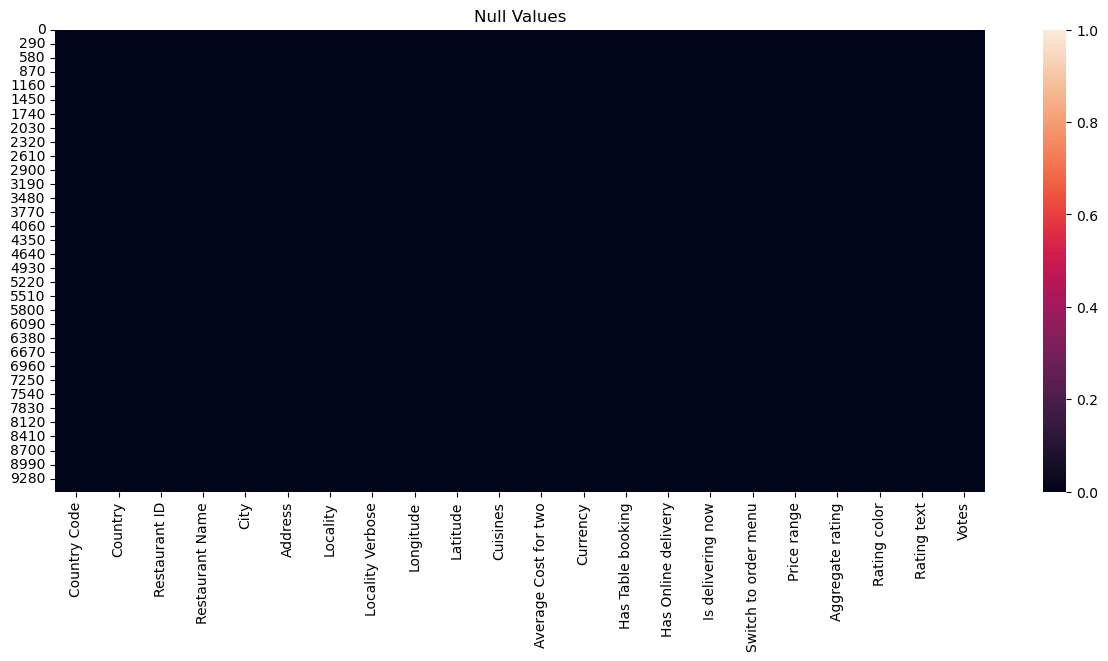

In [11]:
#sns.heatmap(df.isnull())
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()
#By visualization we can clearly say that there is no null values in the dataset.

In [12]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
df.describe()


,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Country', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [18]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Country Code', 'Restaurant ID', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [176]:

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Country Code', 'Restaurant ID', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [40]:
df['Country'].value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [20]:
df['Rating color'].value_counts()



Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [41]:
df['Is delivering now'].value_counts()


No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [42]:
df['Has Online delivery'].value_counts()


No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [175]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
#for i in df.columns:
 #       print(df[i].value_counts())
  #      print('****************************************')

In [43]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Country', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [25]:
df.skew()


Country Code             3.043965
Restaurant ID            0.061570
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

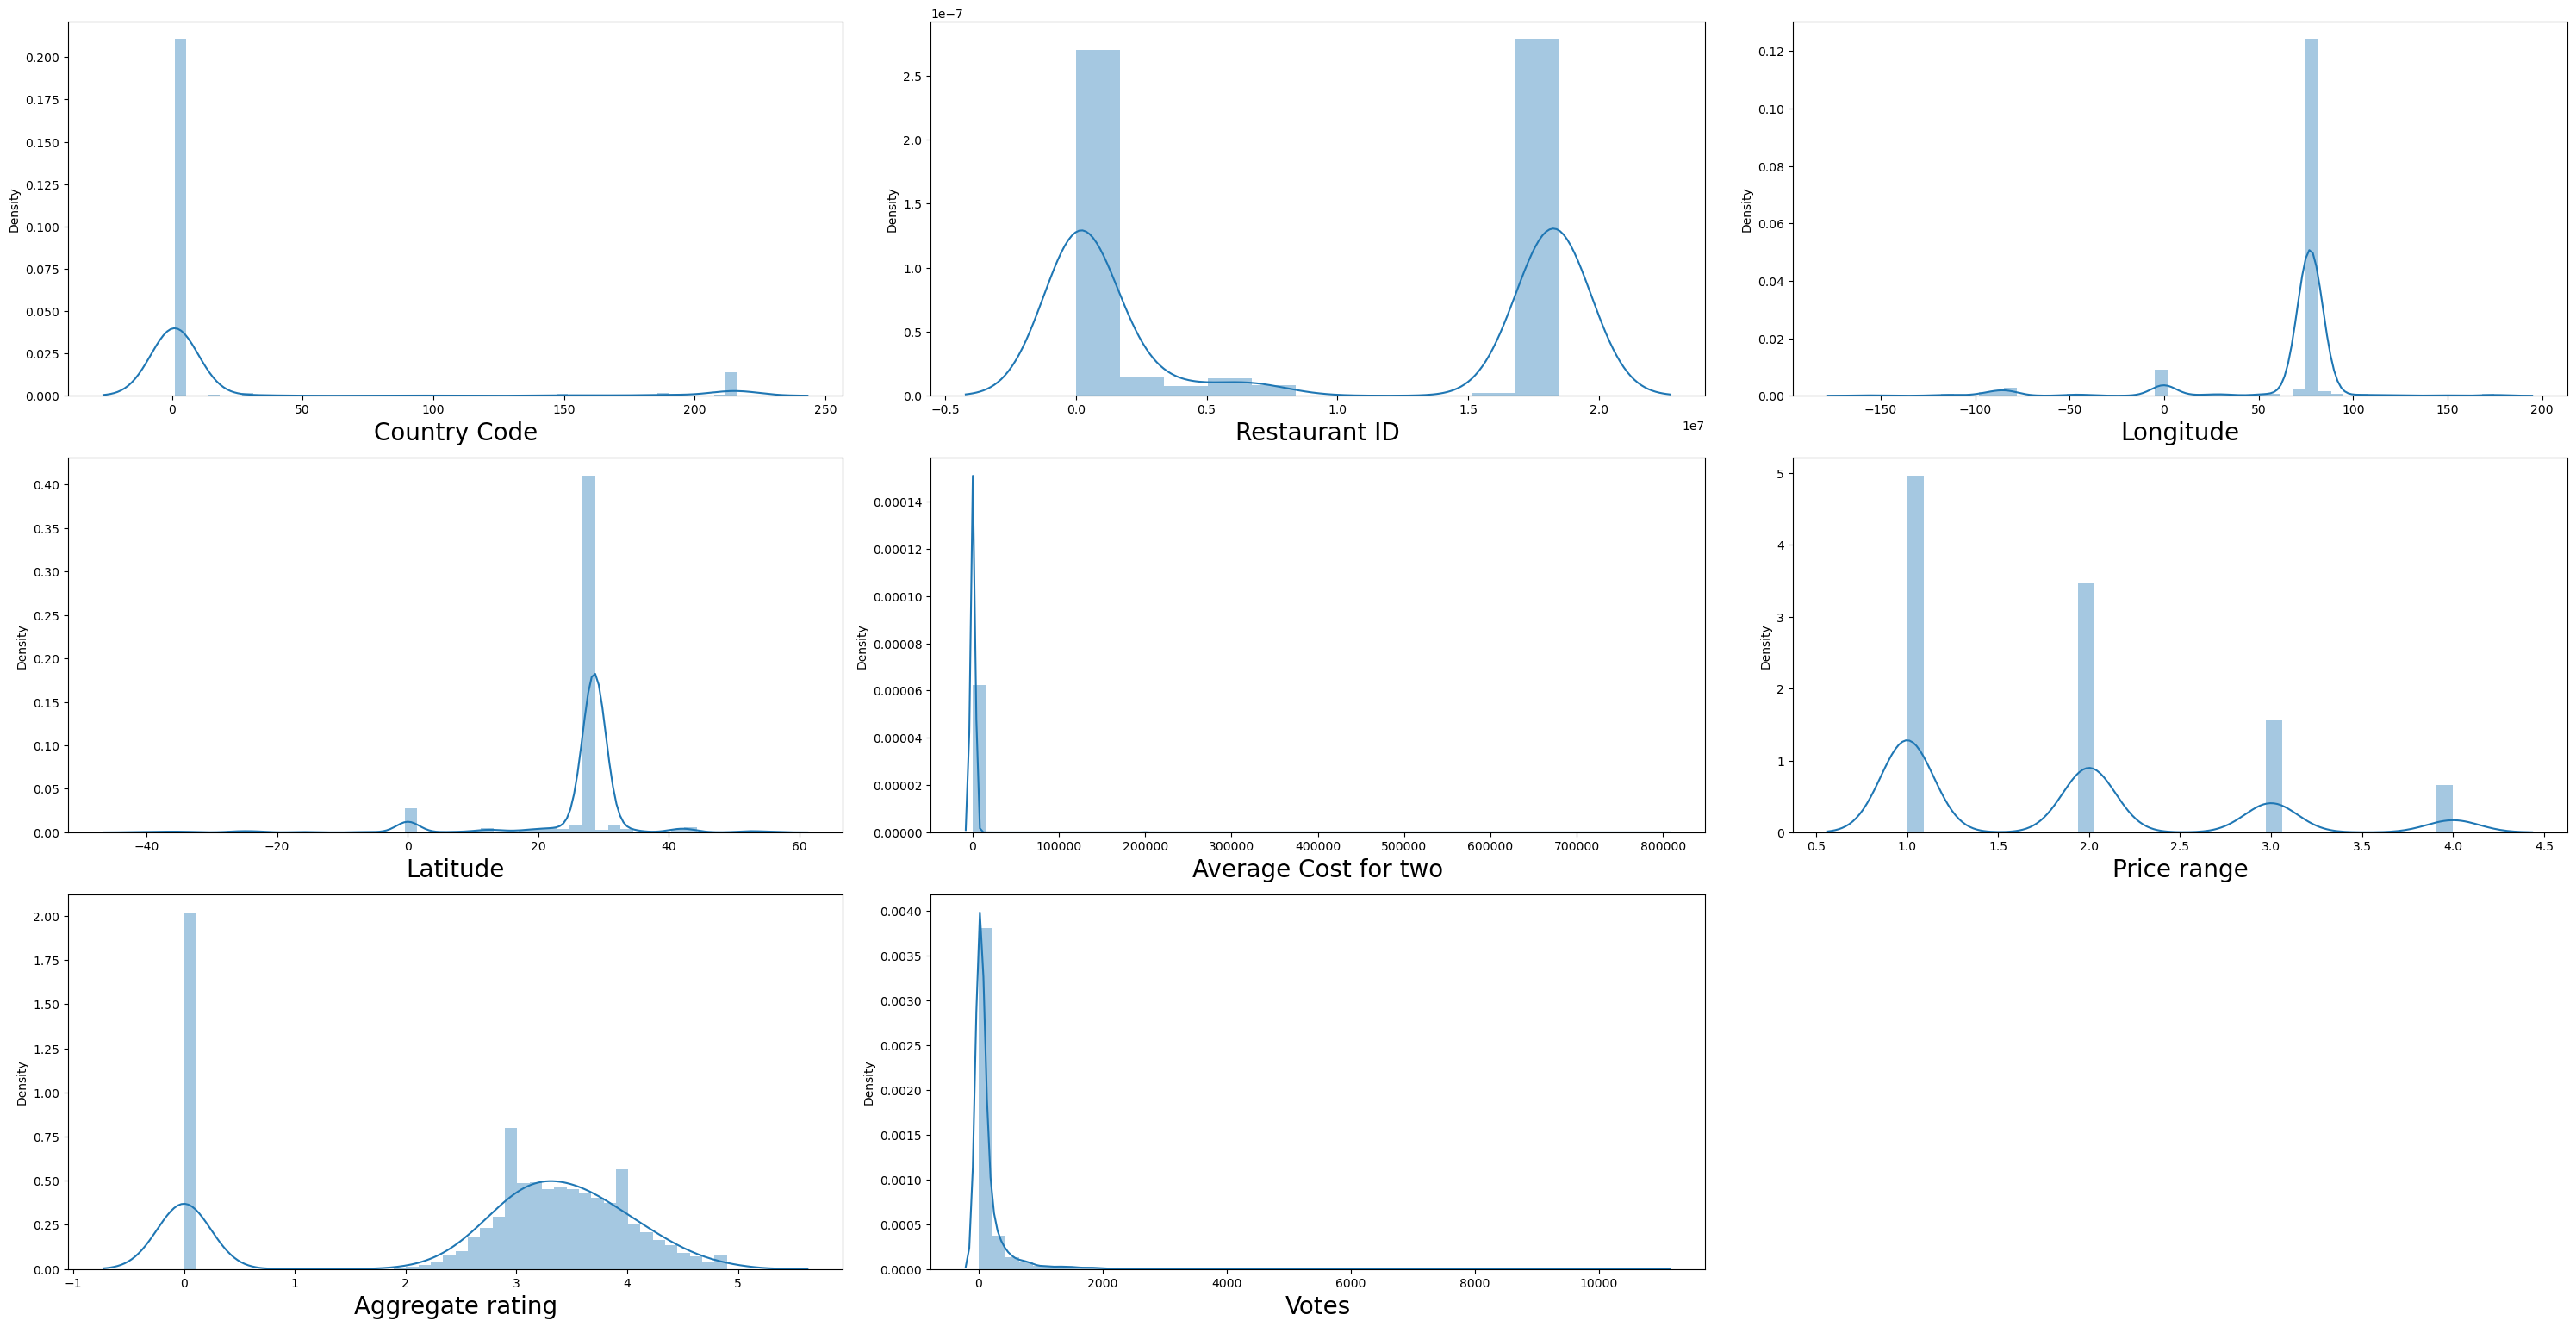

In [26]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[num_col]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

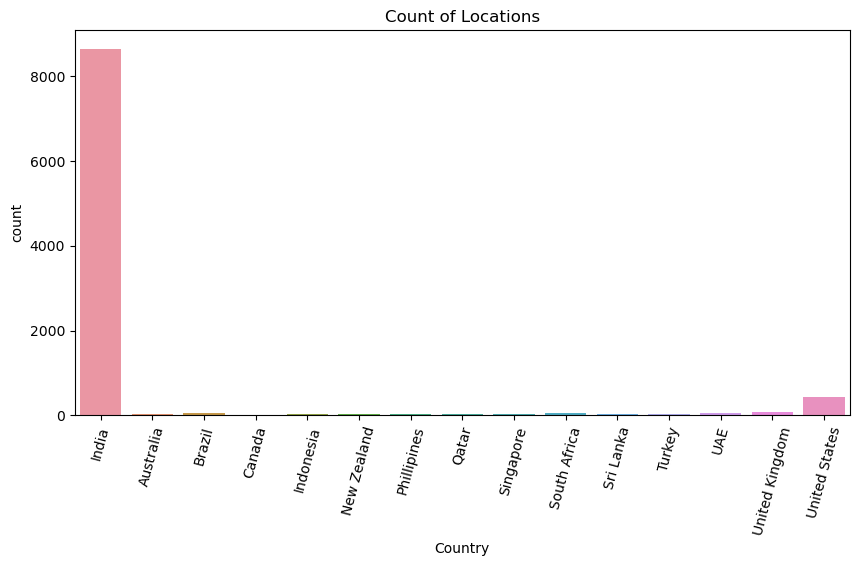

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df["Country"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

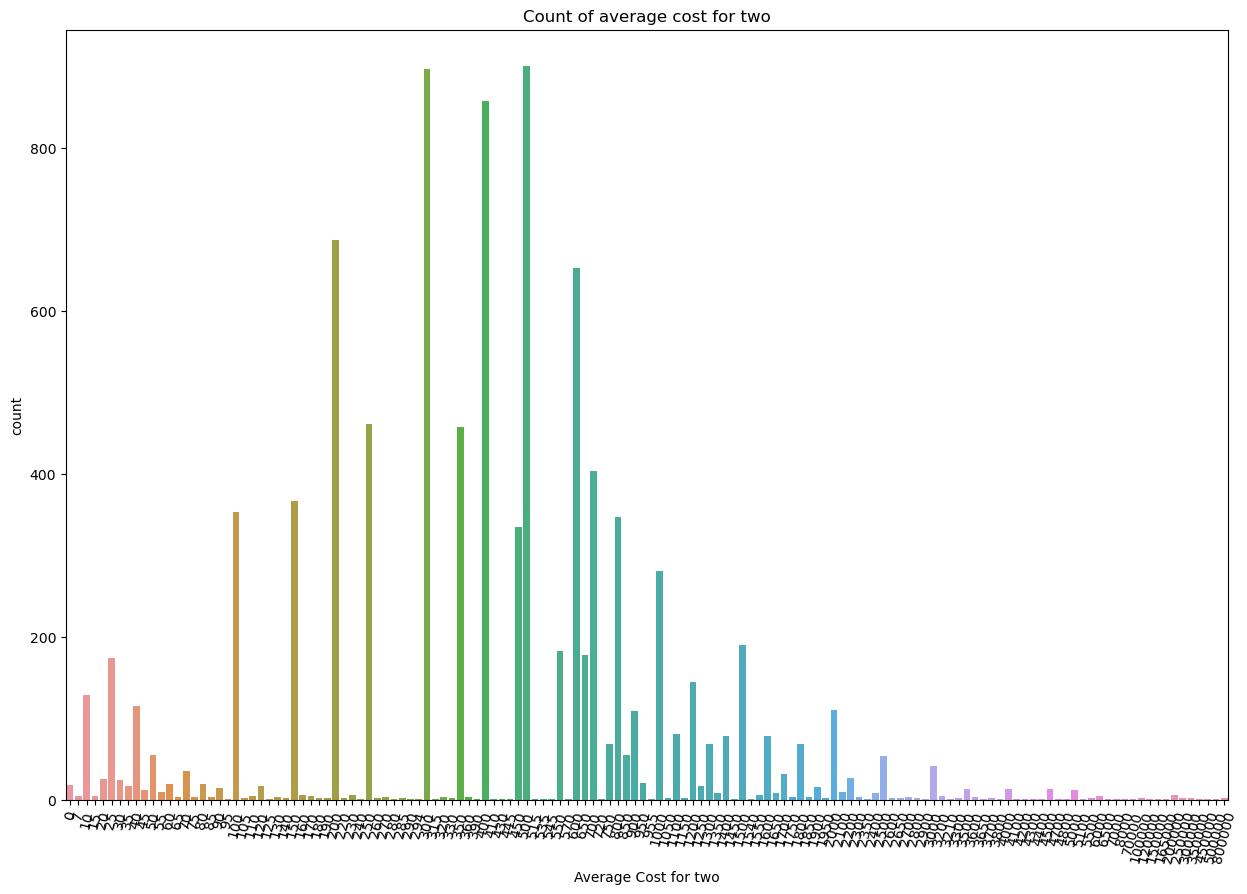

In [28]:
#Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'
plt.figure(figsize=(15,10))
sns.countplot(df["Average Cost for two"])
plt.title("Count of average cost for two")
plt.xticks(rotation=75)
plt.show()

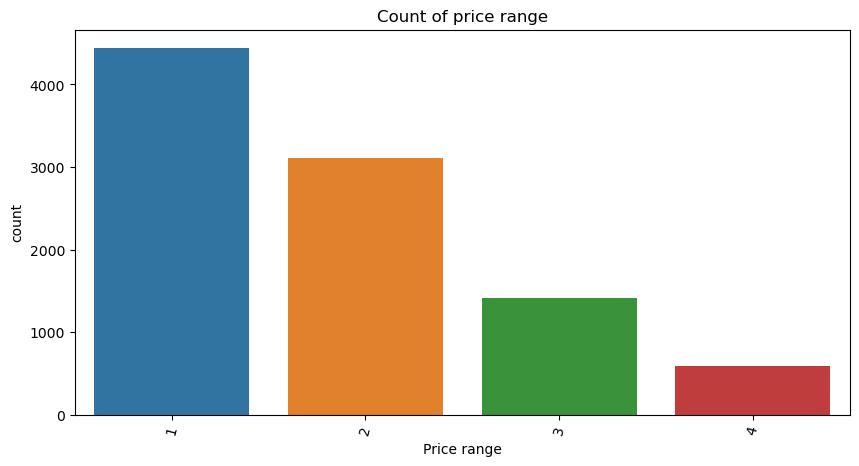

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df["Price range"])
plt.title("Count of price range")
plt.xticks(rotation=75)
plt.show()

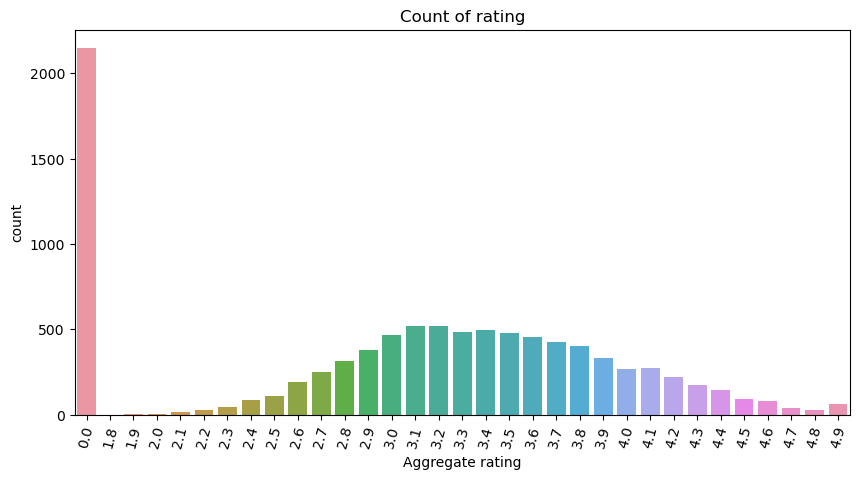

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df["Aggregate rating"])
plt.title("Count of rating")
plt.xticks(rotation=75)
plt.show()

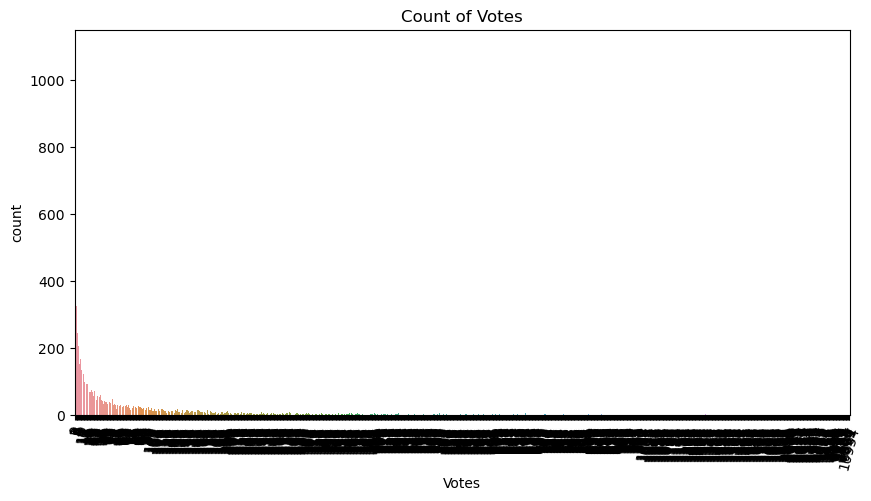

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(df["Votes"])
plt.title("Count of Votes")
plt.xticks(rotation=75)
plt.show()

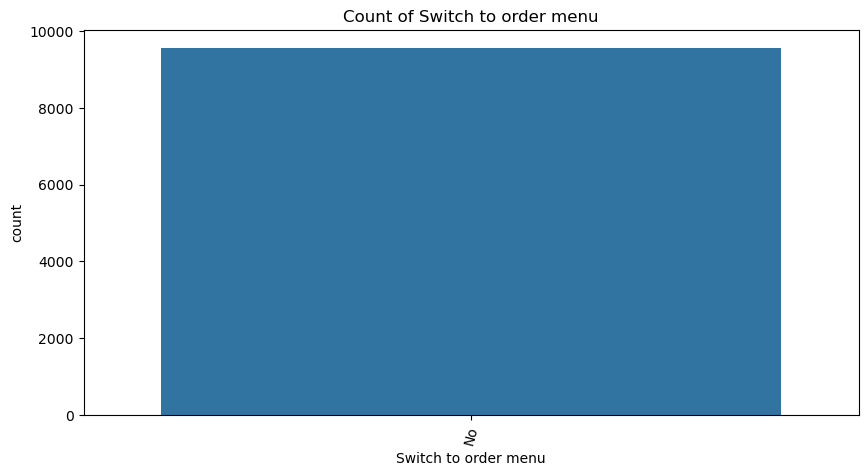

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df["Switch to order menu"])
plt.title("Count of Switch to order menu")
plt.xticks(rotation=75)
plt.show()


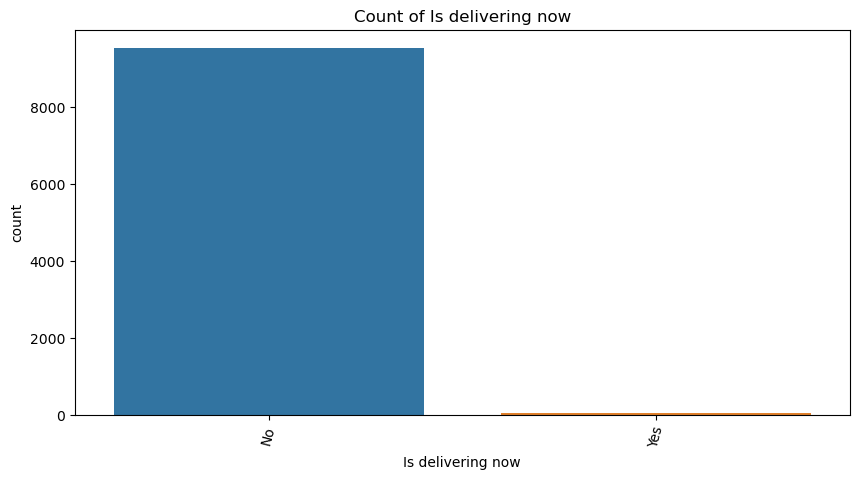

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df["Is delivering now"])
plt.title("Count of Is delivering now")
plt.xticks(rotation=75)
plt.show()


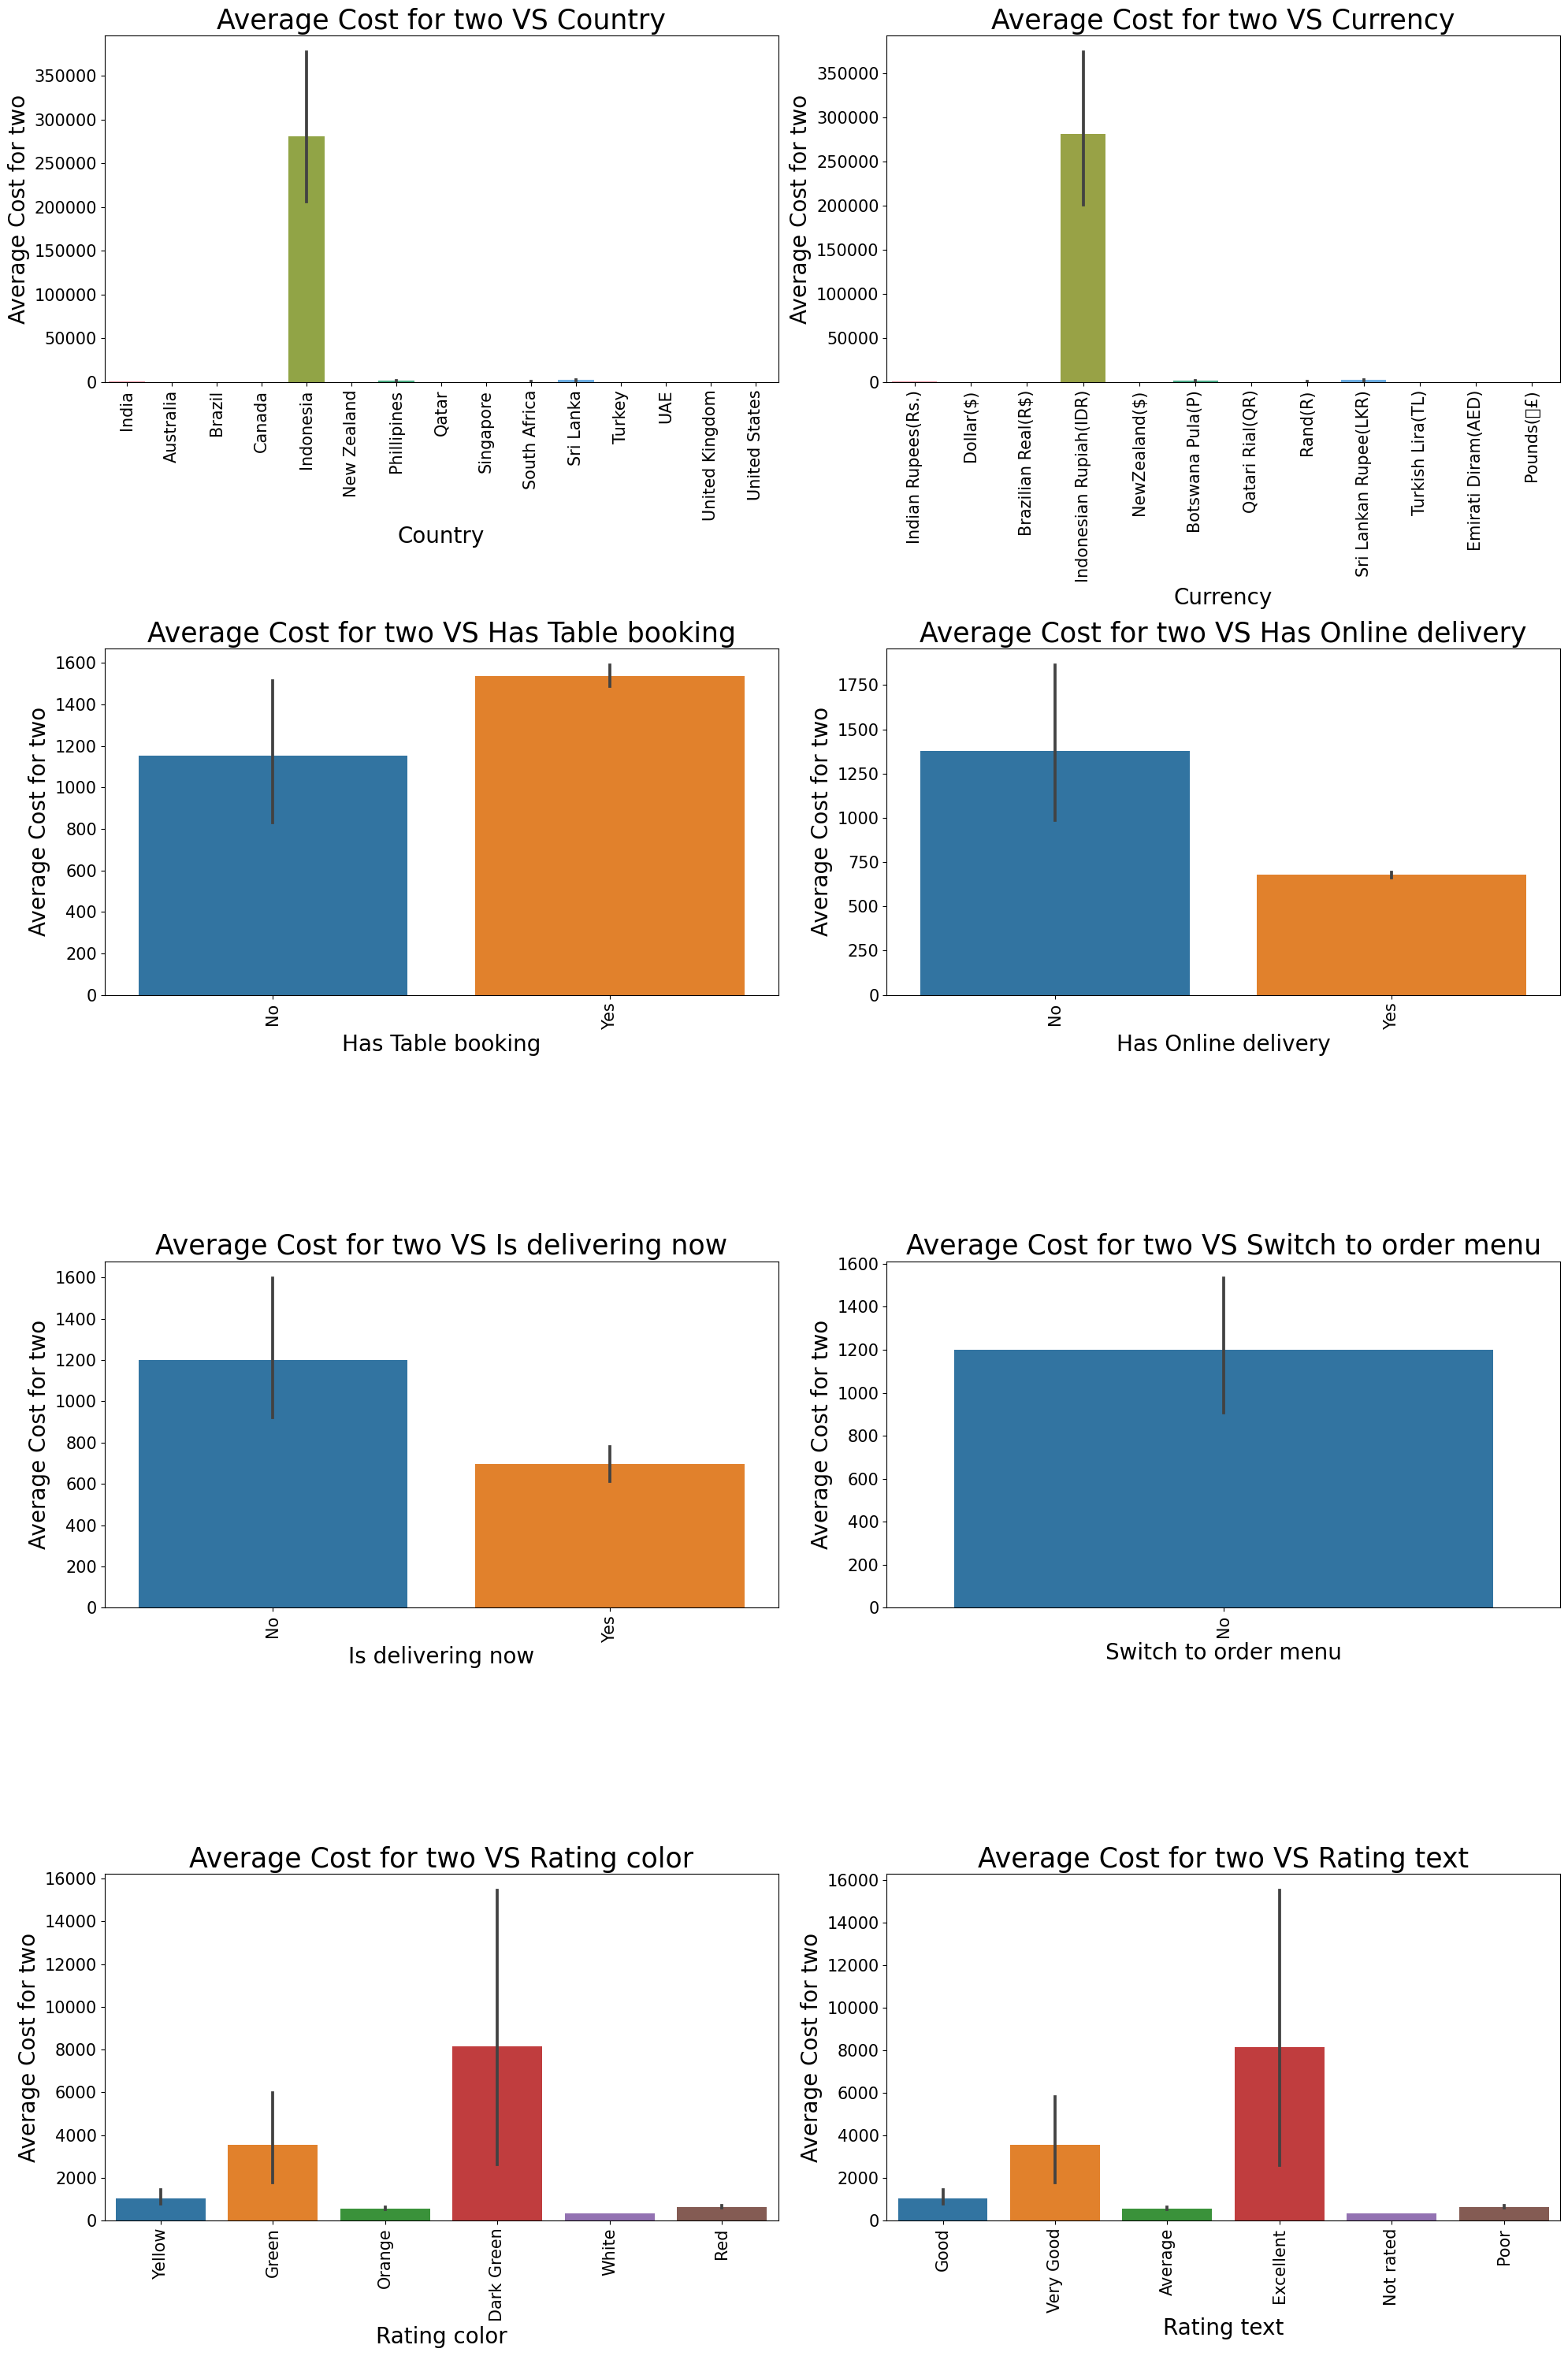

In [45]:
#Bar plot for all categorical columns
cat_col=['Country', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
plt.figure(figsize=(20,30))
for i in range(len(cat_col)):
    plt.subplot(4,2,i+1)
    sns.barplot(y=df['Average Cost for two'],x=df[cat_col[i]])
    plt.title(f"Average Cost for two VS {cat_col[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(cat_col[i],fontsize = 20)
    plt.ylabel('Average Cost for two',fontsize = 20)
    plt.tight_layout()

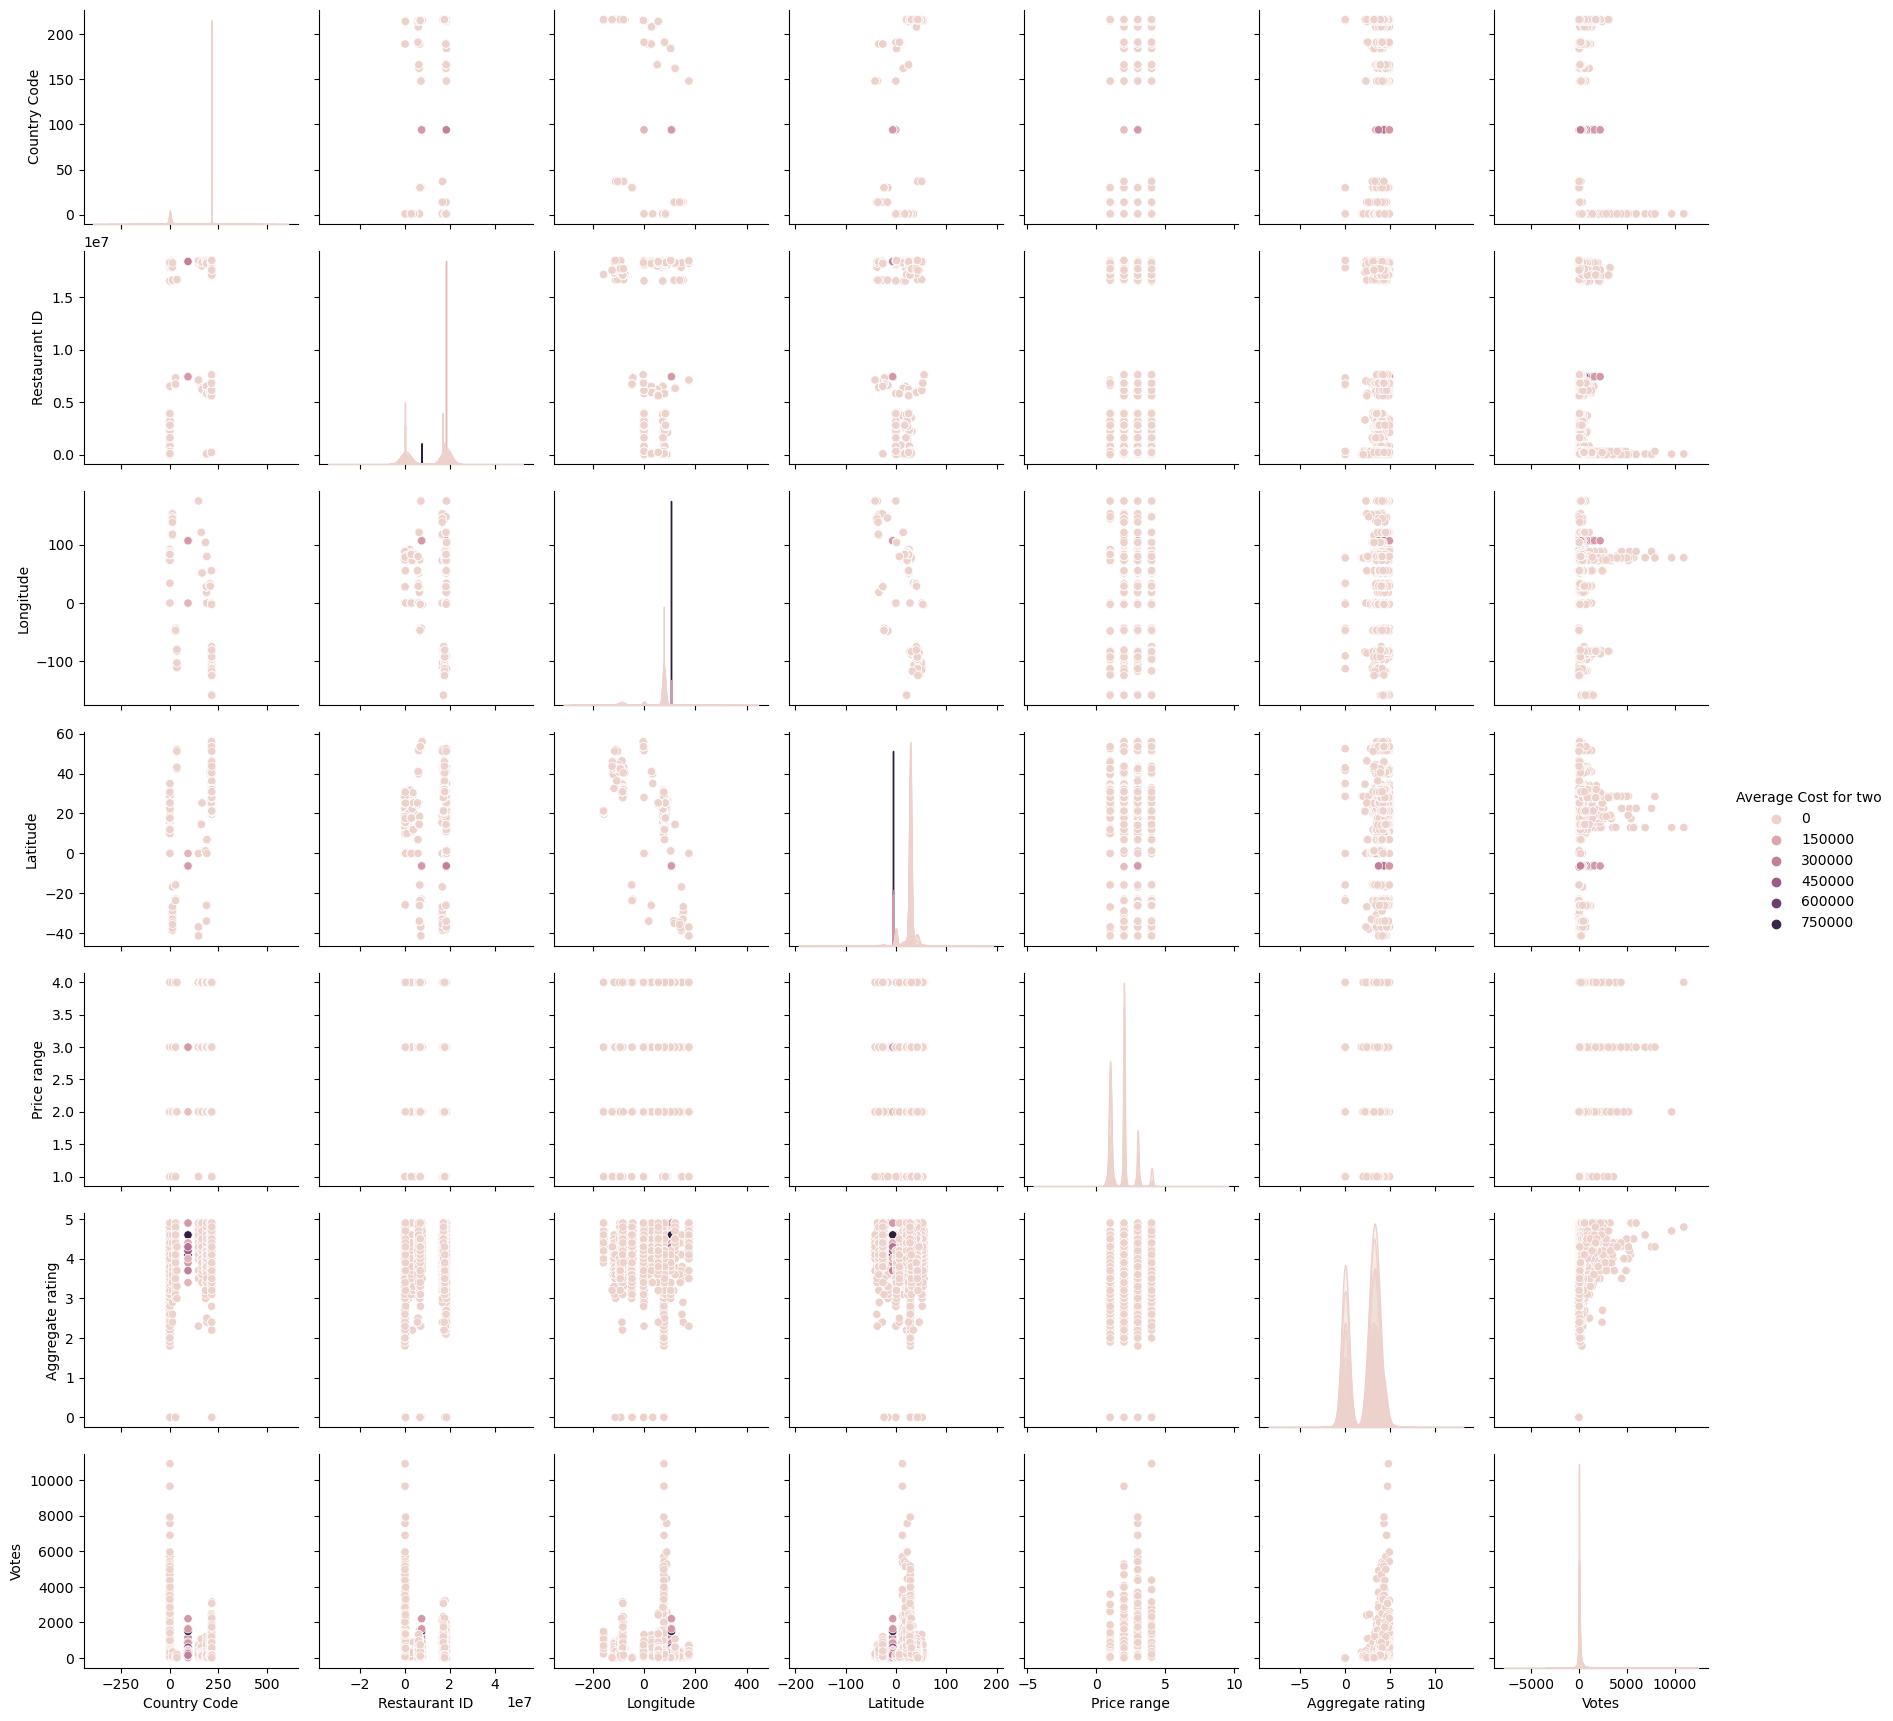

In [35]:
#pair ploting for df
sns.pairplot(df,hue="Average Cost for two")

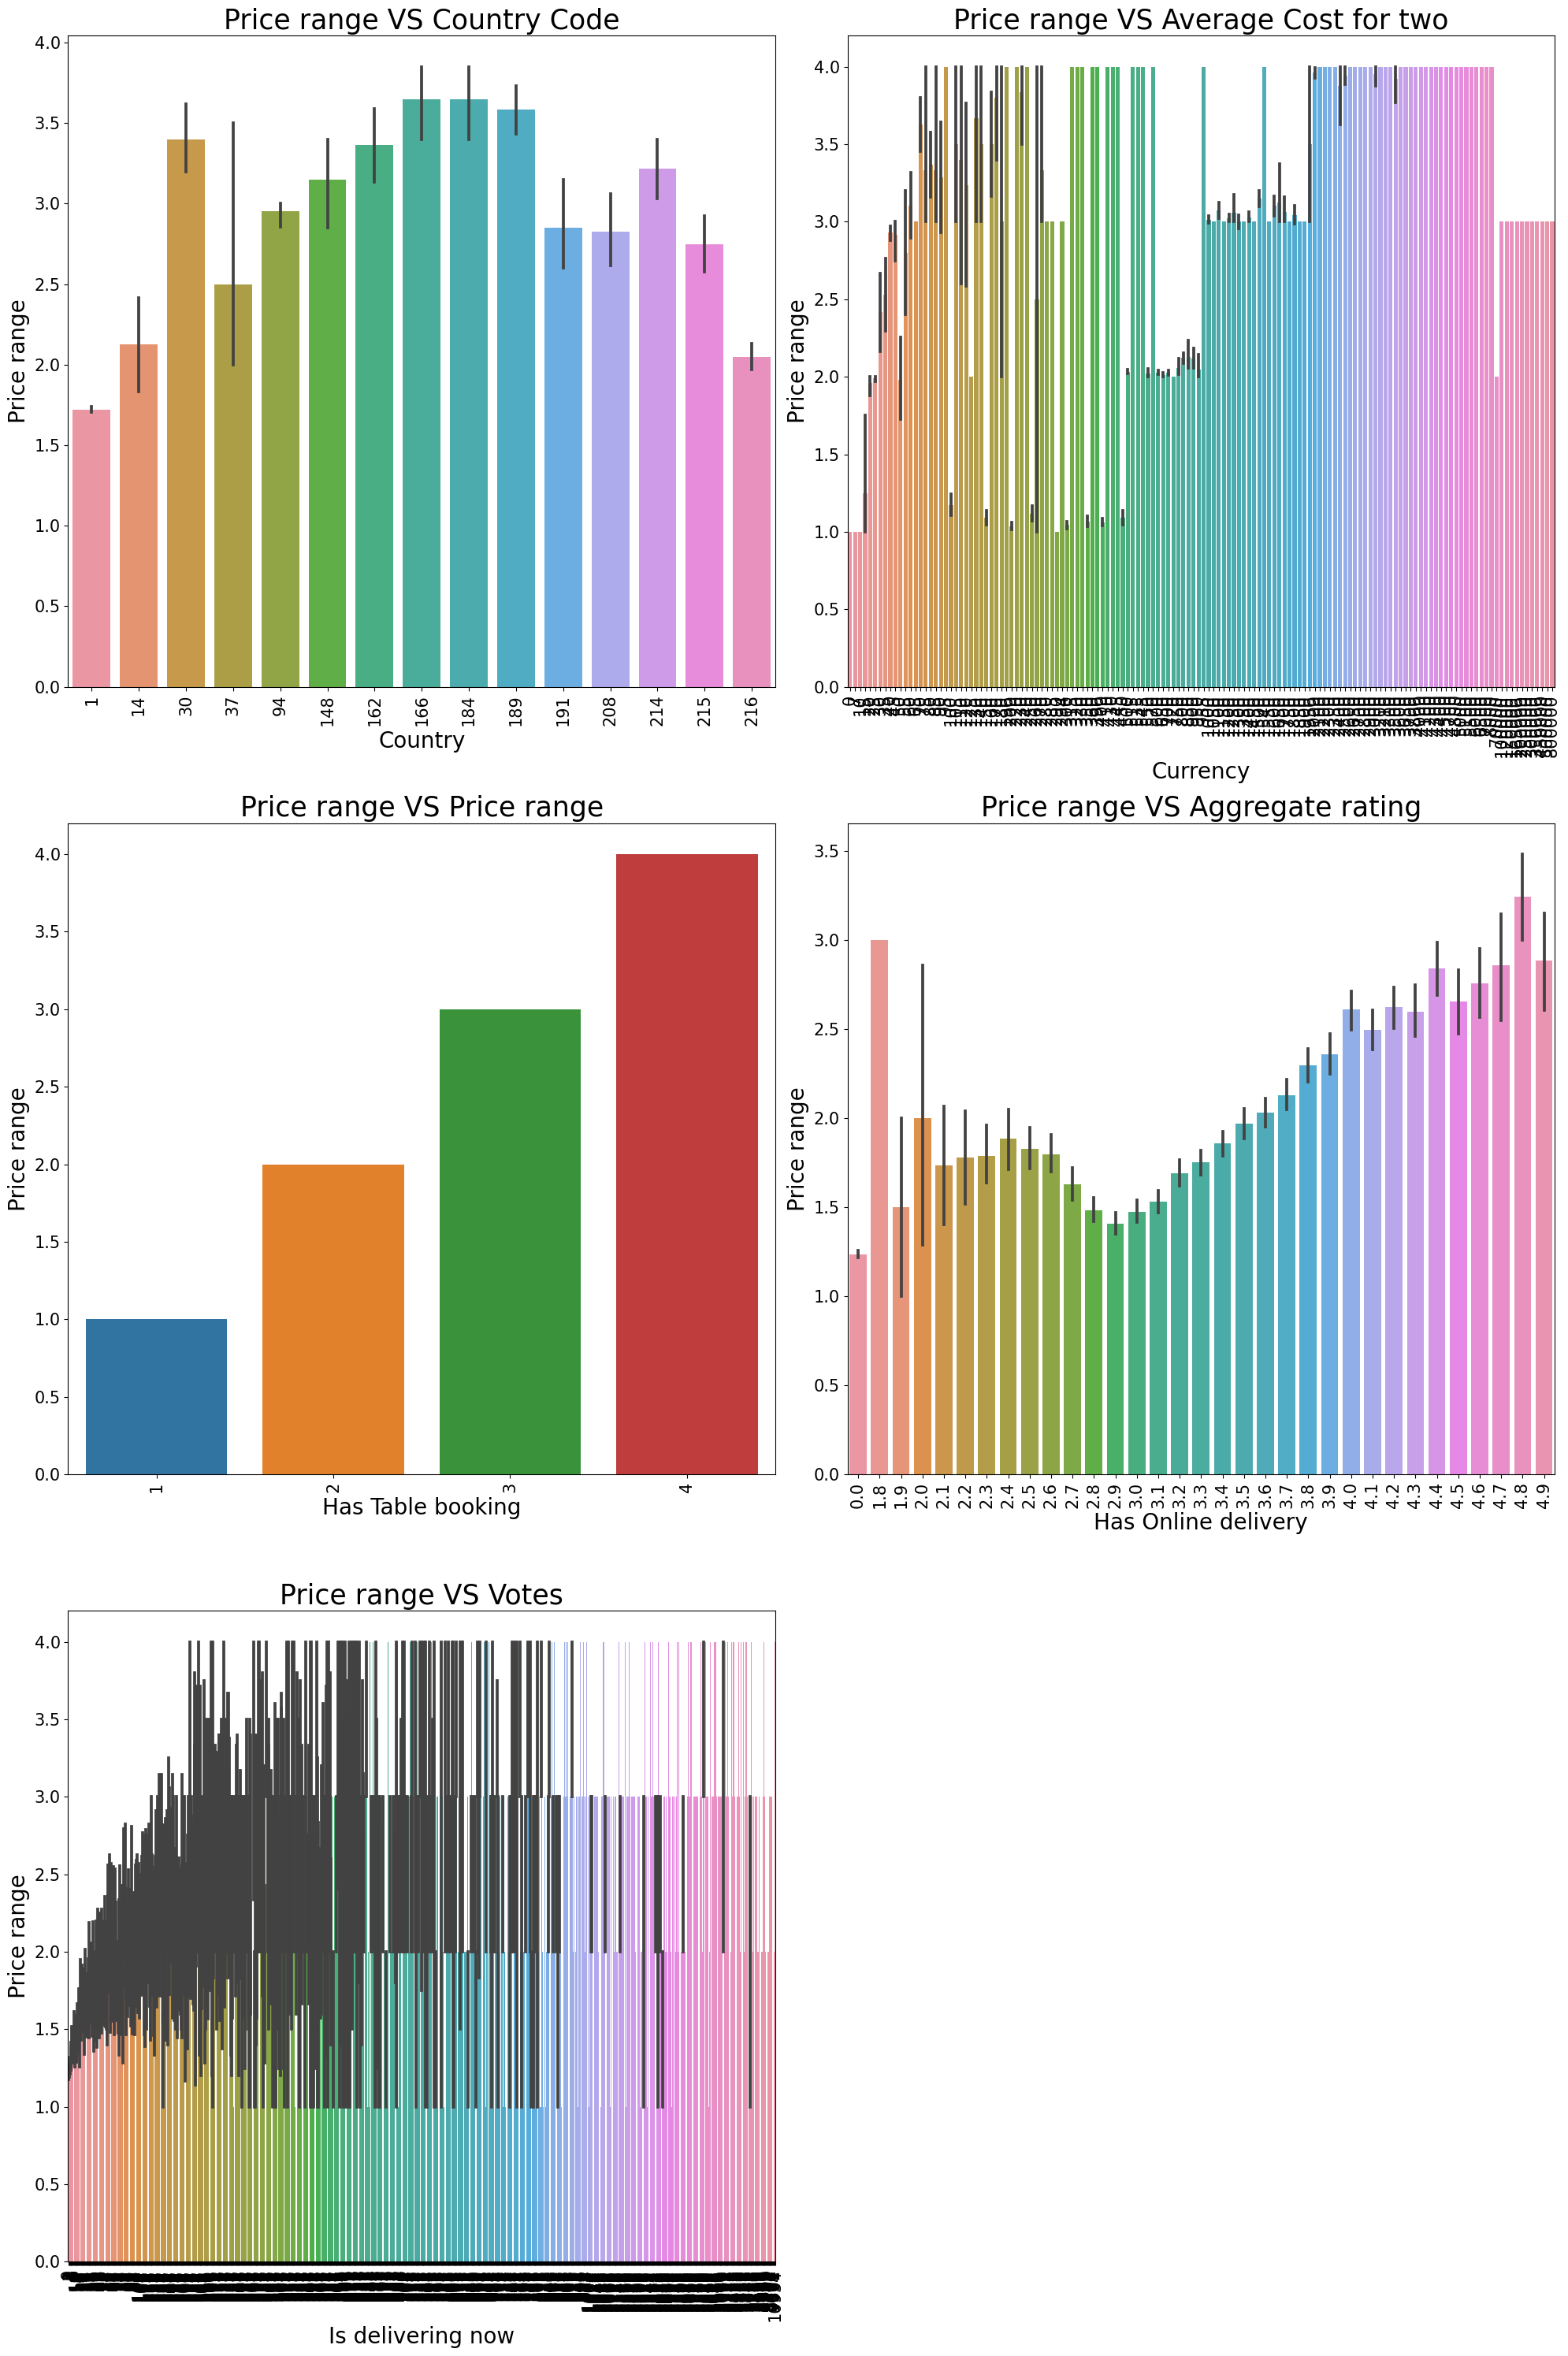

In [58]:
#regplot for numerical columns
num_col=['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
plt.figure(figsize=(20,30))
for i in range(len(num_col)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price range'],x=df[num_col[i]])
    plt.title(f"Price range VS {num_col[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(cat_col[i],fontsize = 20)
    plt.ylabel('Price range',fontsize = 20)
    plt.tight_layout()

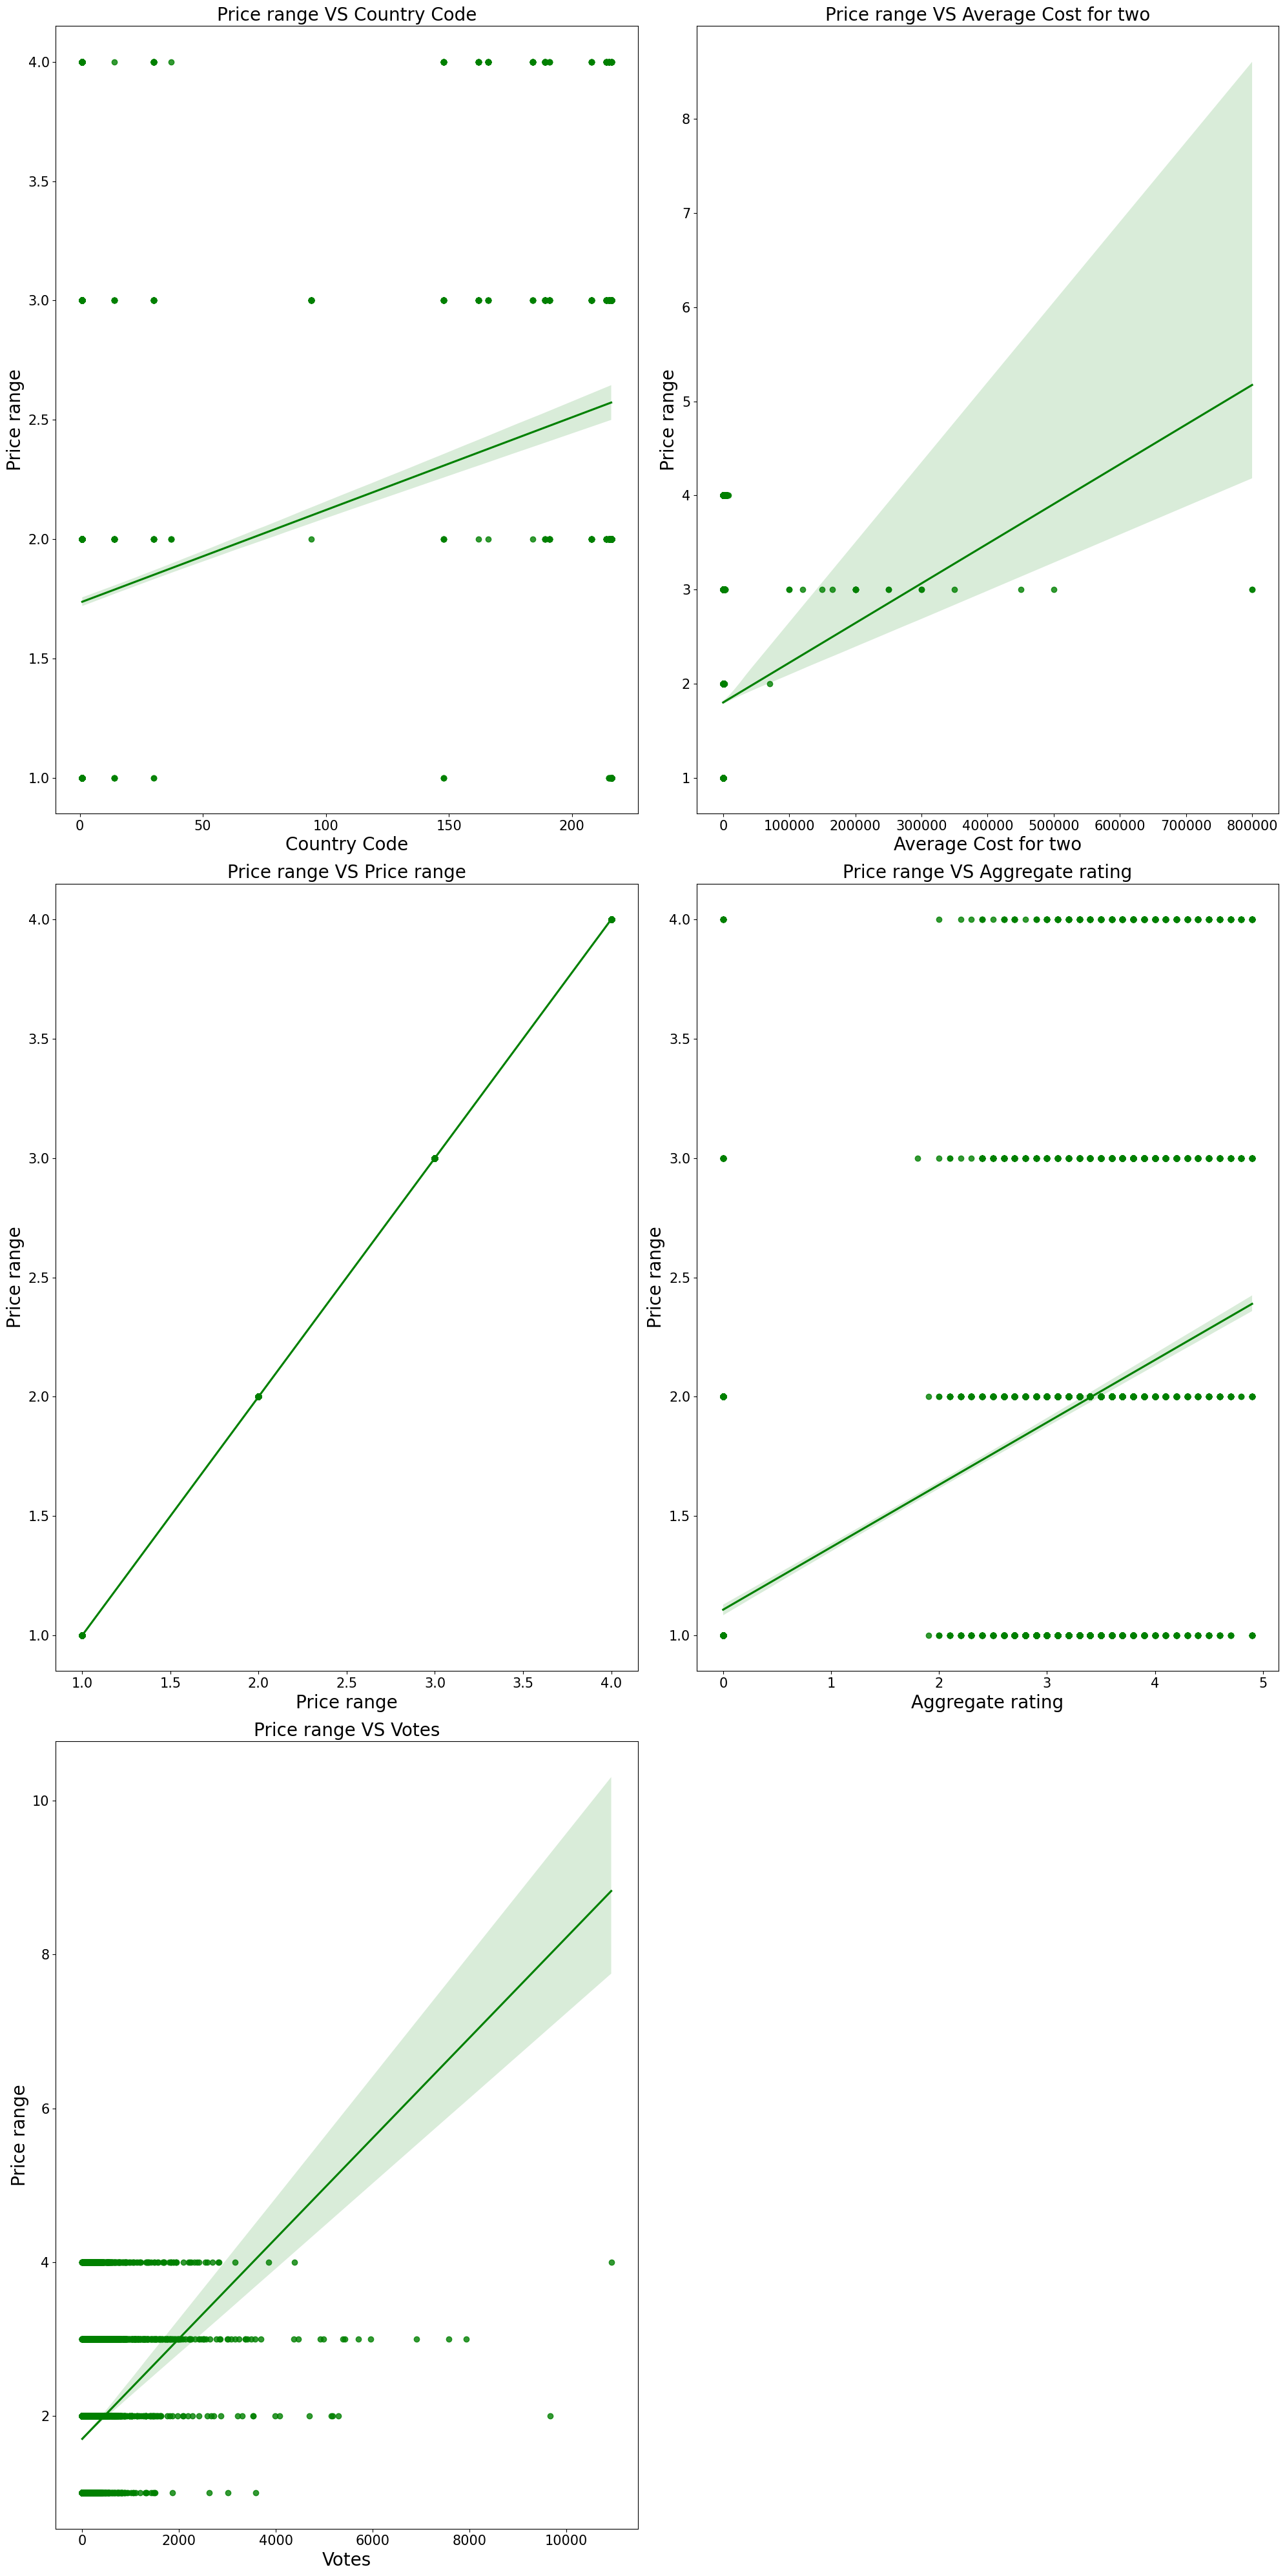

In [60]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(num_col)):
    plt.subplot(3,2,i+1)
    sns.regplot(x=df[num_col[i]] , y=df['Price range'],color="g")
    plt.title(f"Price range VS {num_col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(num_col[i],fontsize = 20)
    plt.ylabel('Price range',fontsize = 20)
    plt.tight_layout()

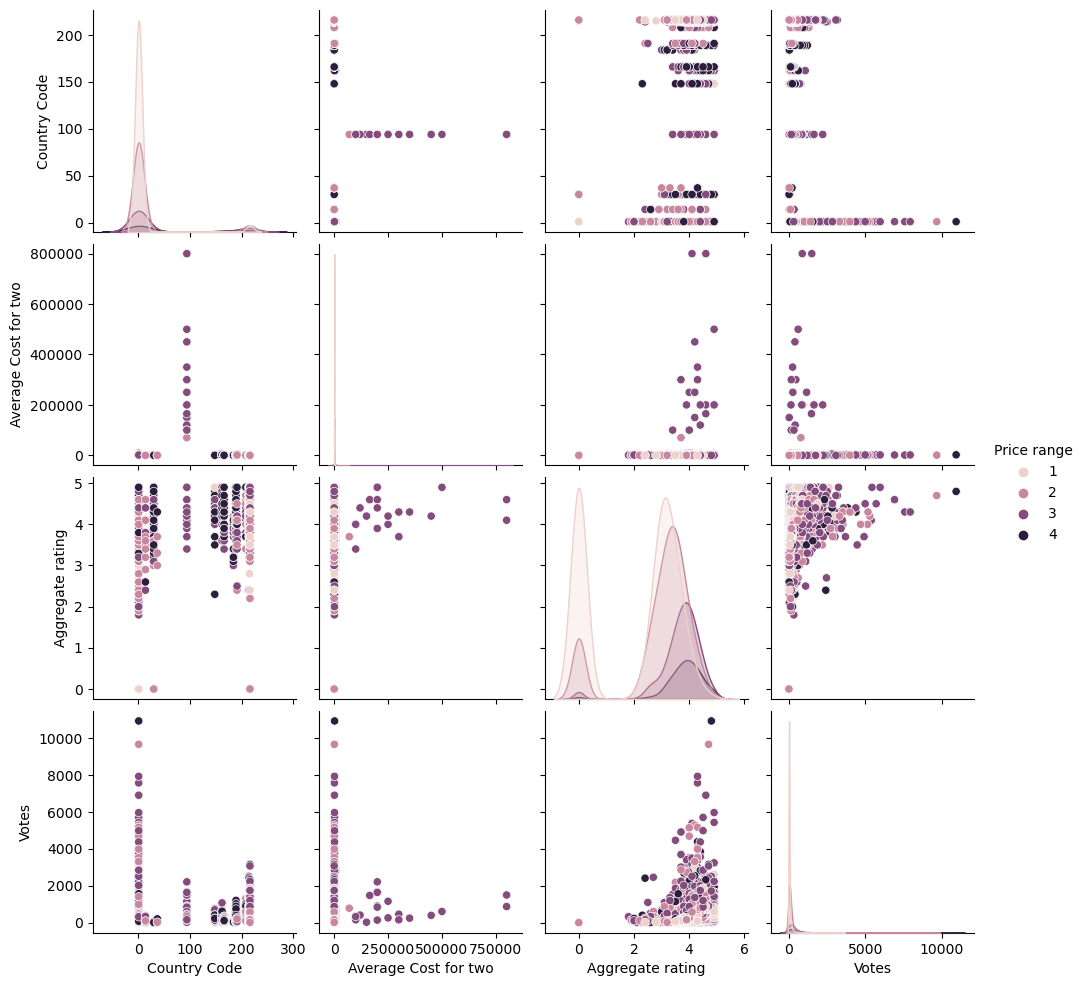

In [62]:
#pair ploting for df
sns.pairplot(df,hue="Price range")

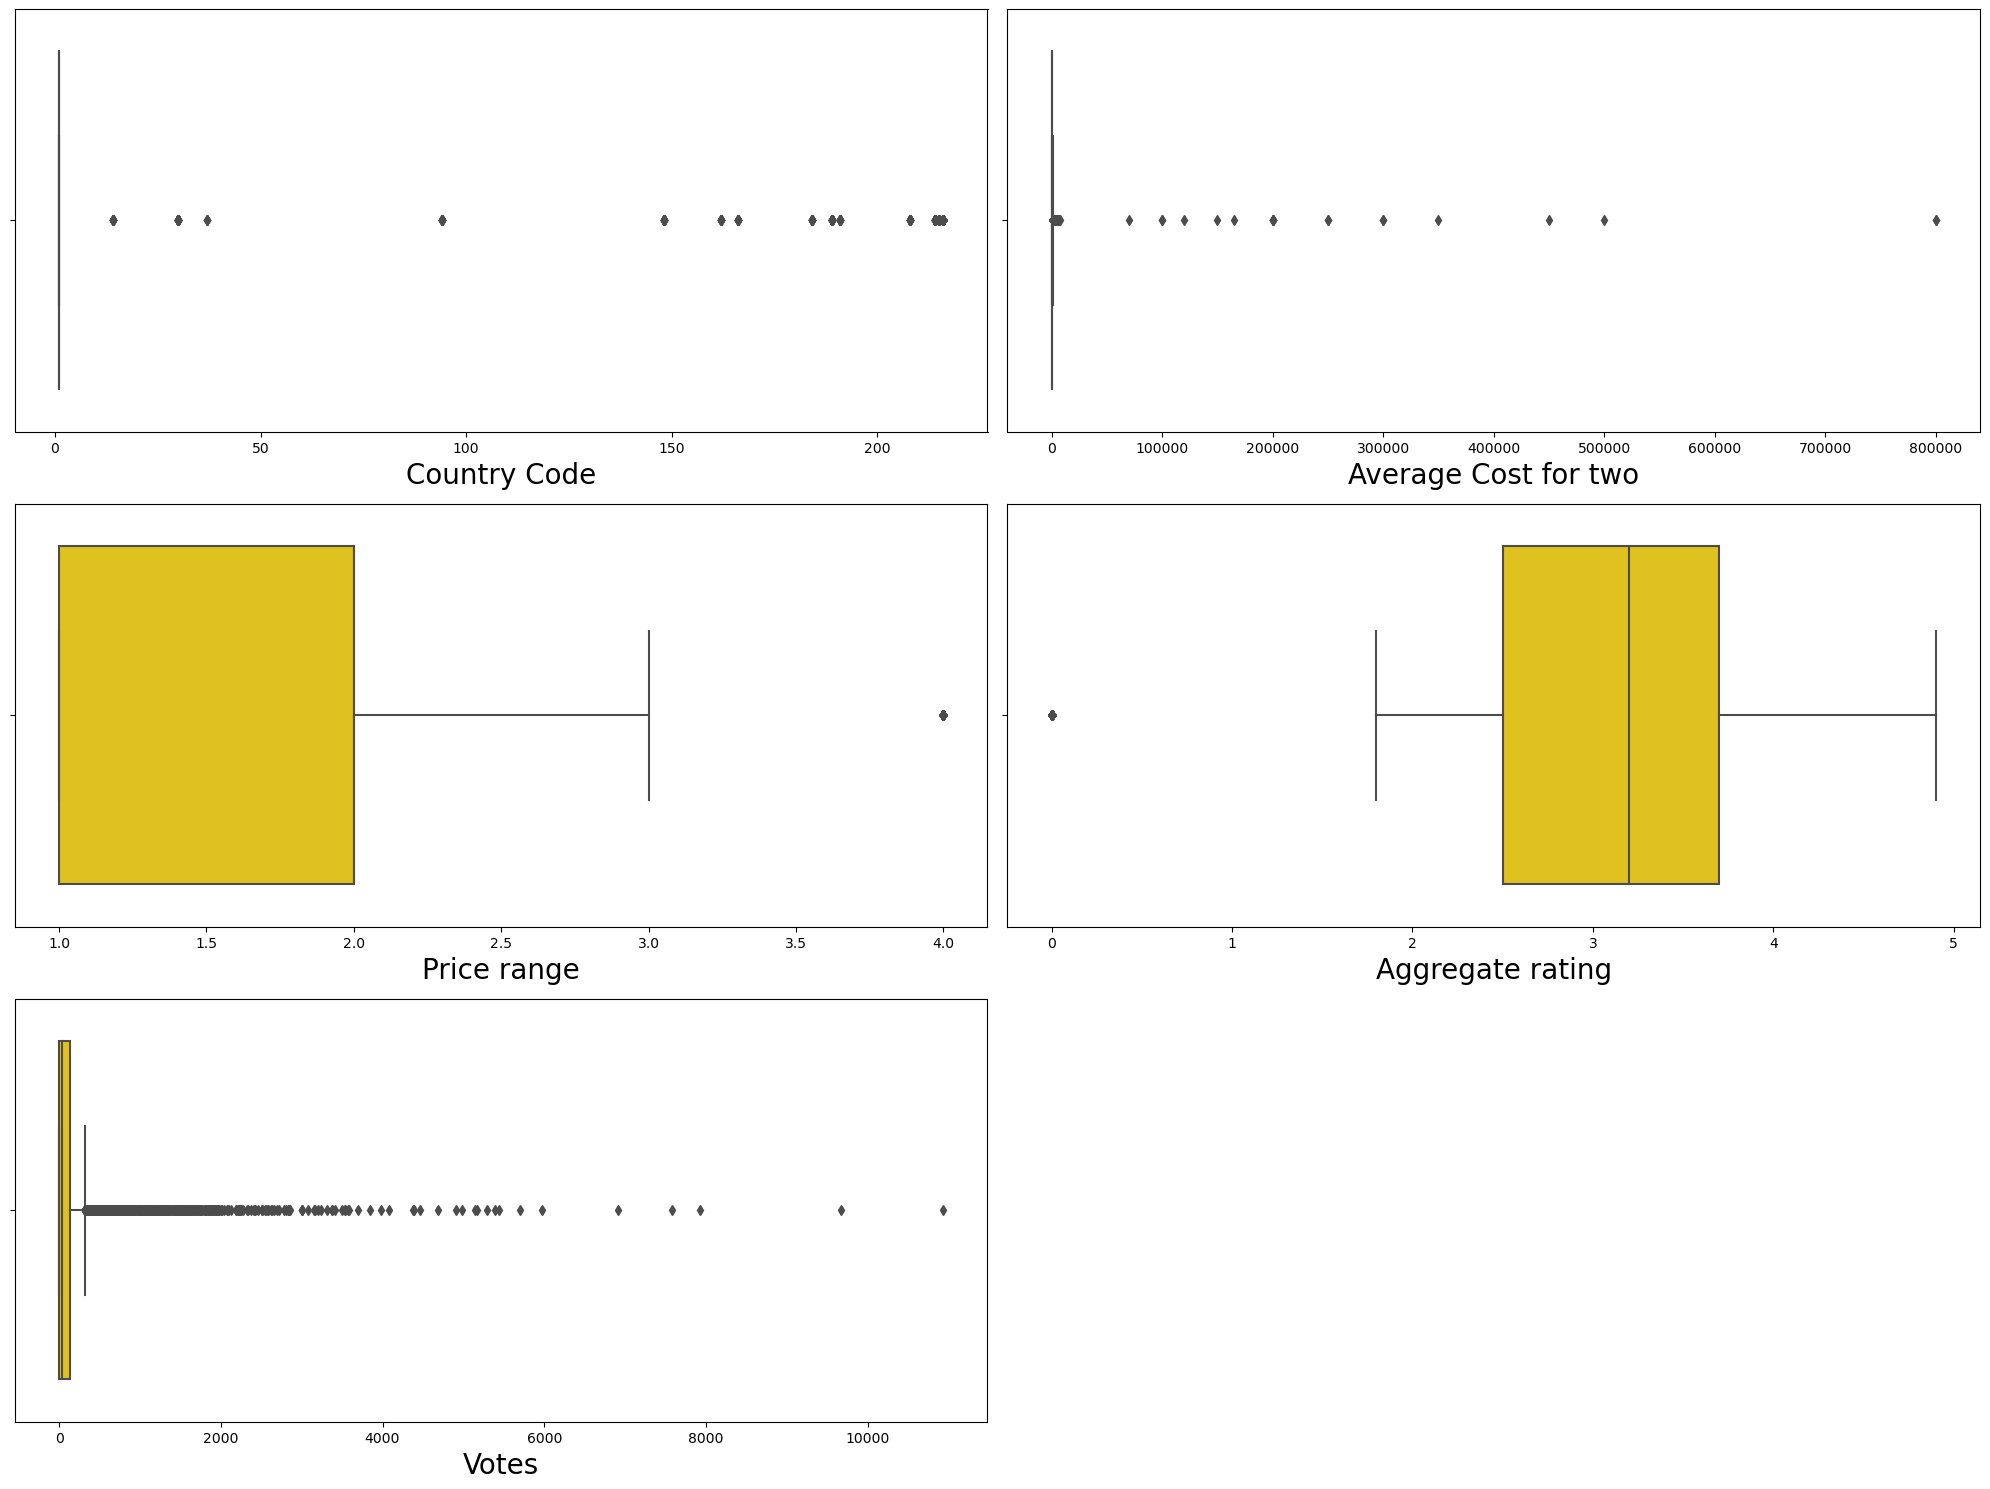

In [80]:
#Checking for outliers:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [81]:
#There are outliers . Since Average Cost for two, Price range is our target we should not remove outliers from it.

In [83]:
#Removing Outliers:
#i) Zscore method:
#Features having outliers 
features=df[['Country Code', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [85]:
#Checking shape of new dataset
df_new.shape

(8692, 22)

In [86]:
#Checking shape of old dataset
df.shape

(9551, 22)

In [88]:
#Checking dataloss in zscore method
Dataloss = (((9551-8692)/9551)*100)
Dataloss

8.993822636373155

In [89]:
#In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

In [90]:
#ii) IQR method:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [91]:
#Checking shape of new dataset
df_1.shape

(5218, 22)

In [92]:
#Checking shape of old dataset
df.shape

(9551, 22)

In [94]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((9551-5218)/9551)*100)
Dataloss
#In IQR method the data loss is more than 10% so let me stick on to Z-score method itself.



45.366977279865985

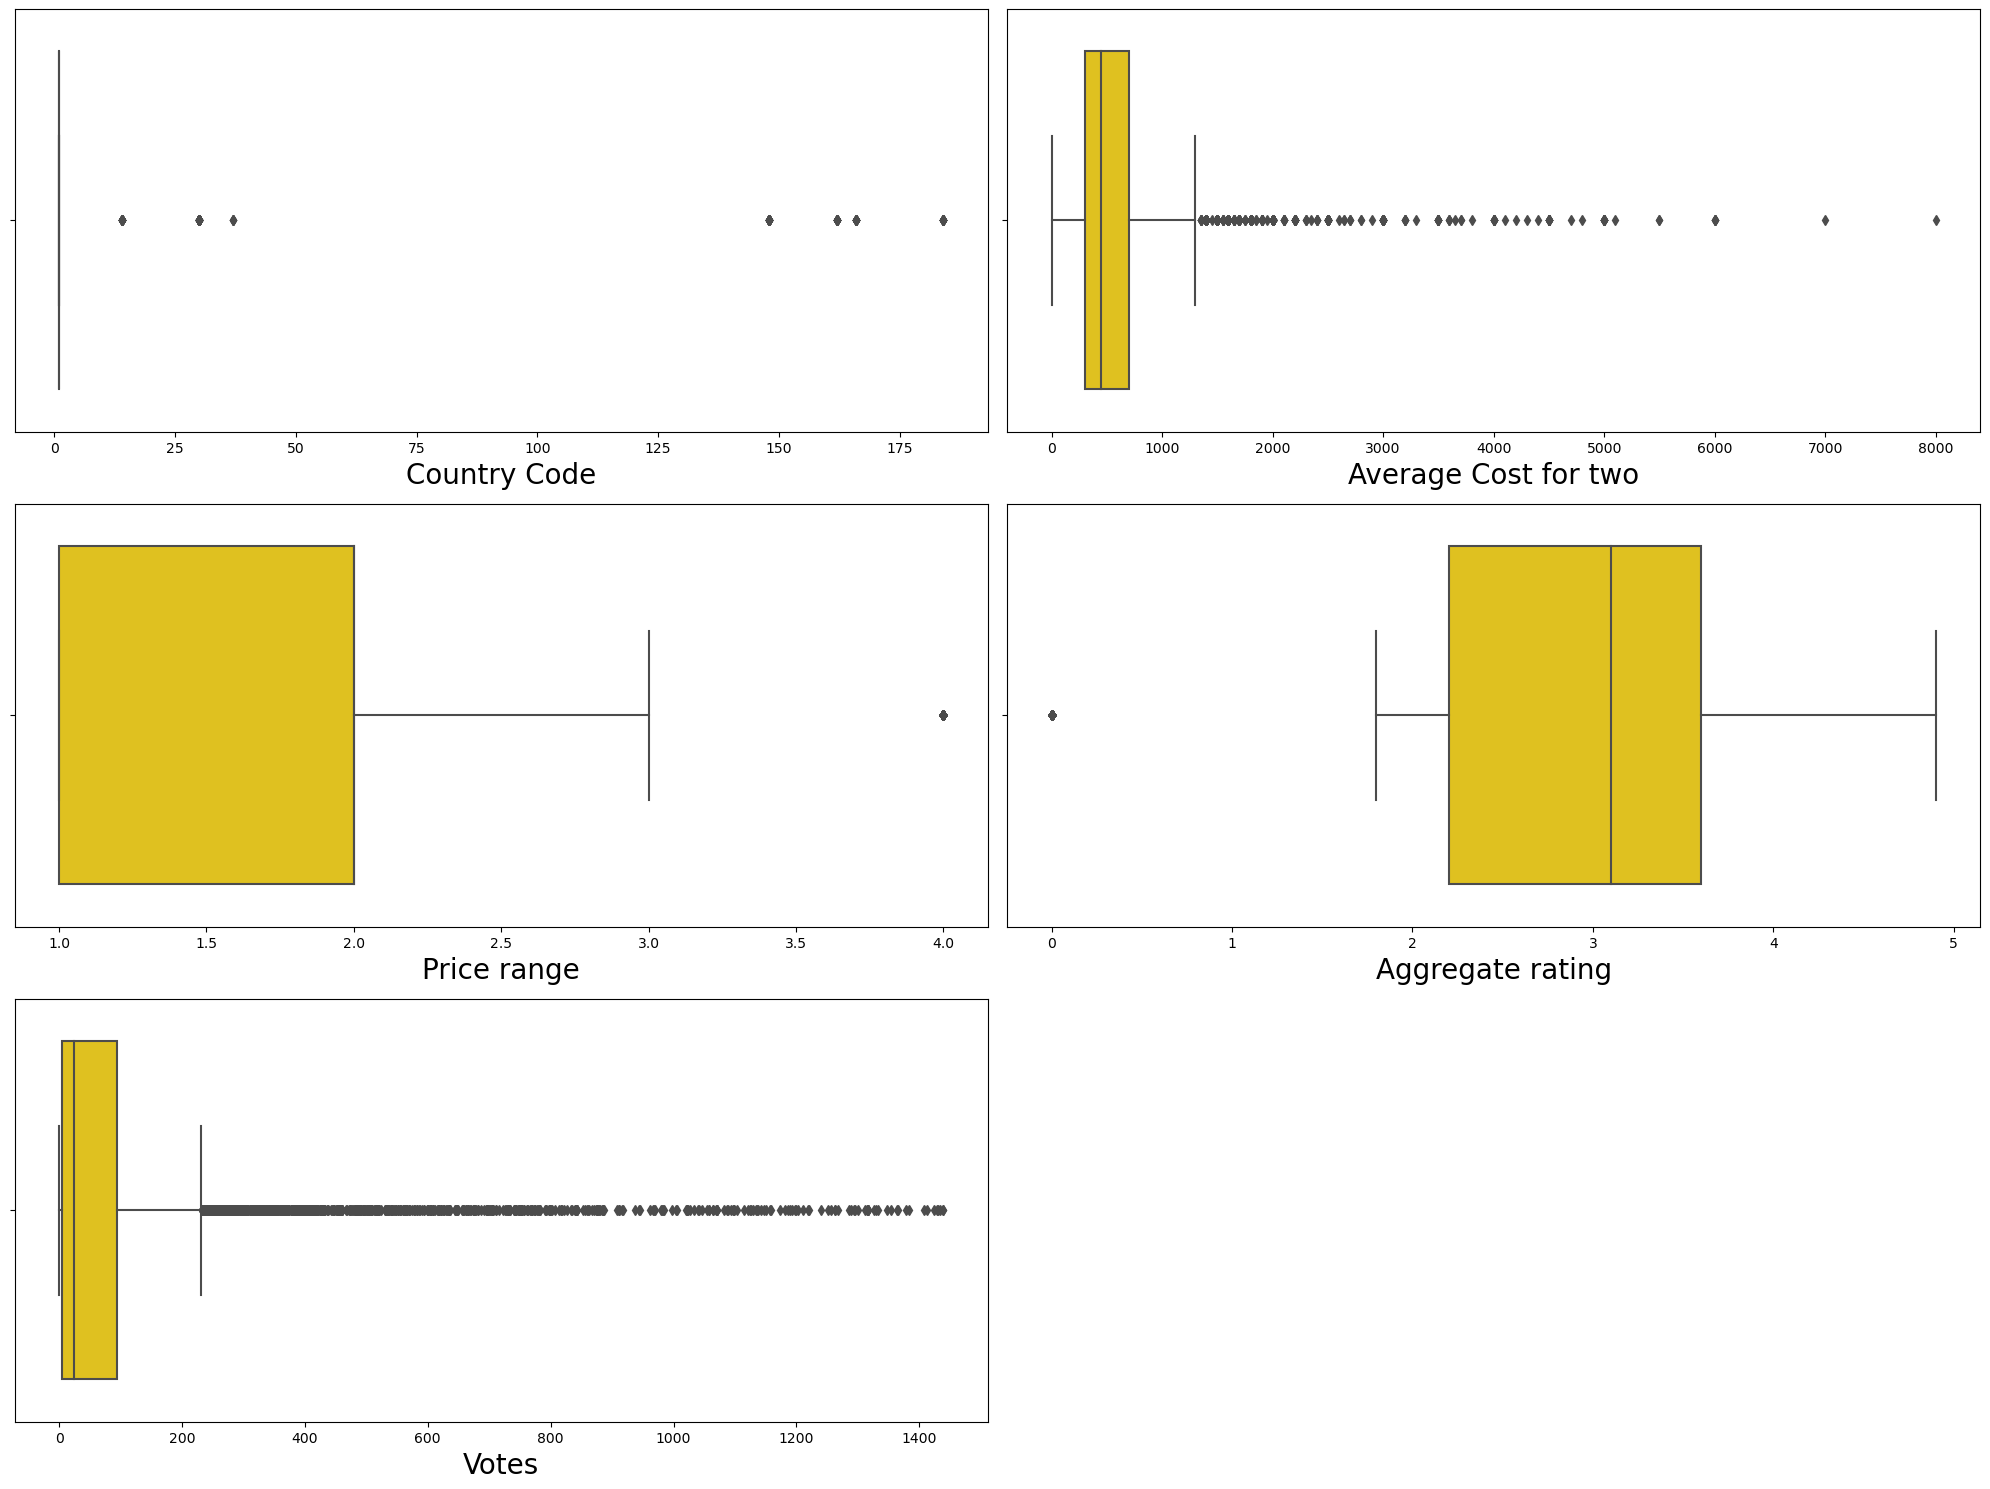

In [95]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df_new[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [96]:
#Outliers has been reduced in all the columns.

In [99]:
#Checking for skewness:
# Now checking for numerical columns
num_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Country Code', 'Restaurant ID', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [101]:
#Checking for skewness in the dataset
df_new[num_col].skew()

Country Code            8.892253
Restaurant ID           0.117696
Longitude              -2.579169
Latitude               -3.849130
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                   3.642933
dtype: float64

In [106]:
#Creating a list of skewed features
fea=['Country Code','Restaurant ID','Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

In [107]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [108]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)


In [109]:
#Checking skewness again
df_new[fea].skew()

Country Code            6.540985
Restaurant ID          -0.293003
Longitude               0.432045
Latitude               -1.892419
Average Cost for two   -0.091338
Price range             0.142241
Aggregate rating        0.018892
Votes                   0.018655
dtype: float64

In [110]:
#In all the columns skewness has reduced and in votes,longitude  column skewness is zero after removing which means this column has
#single entry throught out. So let me drop this column as it has no impact on model building.

In [111]:
#Droping height column
df_new = df_new.drop(["Longitude"],axis=1)
df_new = df_new.drop(["Latitude"],axis=1)
df_new = df_new.drop(["Votes"],axis=1)

In [112]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Country', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [115]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)
df_new[cat_col].head()
#Using label encoder i have encoded the categorical columns.



,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,3,2876,0,3896,13,13,1195,3,0,0,0,0,5,2
1,3,4750,0,3947,13,13,1195,3,0,0,0,0,5,2
2,3,6240,0,5493,13,13,992,3,0,0,0,0,5,2
3,3,1499,0,92,132,133,1311,3,0,0,0,0,1,5
4,3,4425,0,1074,132,133,1058,3,0,0,0,0,1,5


In [122]:
#Checking correlation using heat map:

cor=df_new.corr()

cor

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text
Country Code,1.000000,0.060910,0.098286,0.002417,0.001773,-0.026829,-0.029039,-0.027343,-0.070472,-0.247239,-0.449871,-0.019913,-0.091450,-0.009368,0.184737,0.213667,-0.121870,0.091838
Country,0.060910,1.000000,0.011347,0.004521,0.019376,-0.033832,0.007339,0.007672,0.020133,0.073792,0.326487,0.027328,-0.005570,-0.000571,0.035353,0.029393,-0.025987,0.003735
Restaurant ID,0.098286,0.011347,1.000000,0.013638,-0.025507,0.155096,0.079585,0.079991,-0.067459,-0.158815,-0.040980,-0.126463,-0.087520,0.020622,-0.113977,-0.225827,0.127802,0.294105
Restaurant Name,0.002417,0.004521,0.013638,1.000000,0.006436,0.001313,0.007609,0.007506,0.061902,0.057090,-0.002097,0.041382,0.031636,0.013011,0.062056,0.025277,-0.004675,0.007766
City,0.001773,0.019376,-0.025507,0.006436,1.000000,-0.089296,-0.011575,-0.015187,0.010516,-0.068591,-0.089592,0.000224,-0.014553,-0.022616,-0.110419,-0.118689,0.055375,-0.044033
Address,-0.026829,-0.033832,0.155096,0.001313,-0.089296,1.000000,0.144808,0.146429,-0.013876,0.020300,-0.032331,-0.009967,-0.006660,0.029047,-0.037145,-0.090340,0.052384,0.042953
Locality,-0.029039,0.007339,0.079585,0.007609,-0.011575,0.144808,1.000000,0.999142,-0.014245,-0.068532,0.027547,-0.068965,-0.047330,-0.010910,-0.097678,-0.158660,0.004710,0.003615
Locality Verbose,-0.027343,0.007672,0.079991,0.007506,-0.015187,0.146429,0.999142,1.000000,-0.015342,-0.067212,0.028035,-0.068123,-0.047785,-0.010885,-0.095134,-0.156937,0.005025,0.005277
Cuisines,-0.070472,0.020133,-0.067459,0.061902,0.010516,-0.013876,-0.014245,-0.015342,1.000000,0.021163,0.050975,0.043543,-0.034442,0.005775,0.019887,-0.079491,-0.040636,-0.065656
Average Cost for two,-0.247239,0.073792,-0.158815,0.057090,-0.068591,0.020300,-0.068532,-0.067212,0.021163,1.000000,0.043432,0.557442,0.207908,0.029872,0.730884,0.353252,-0.048814,0.020589


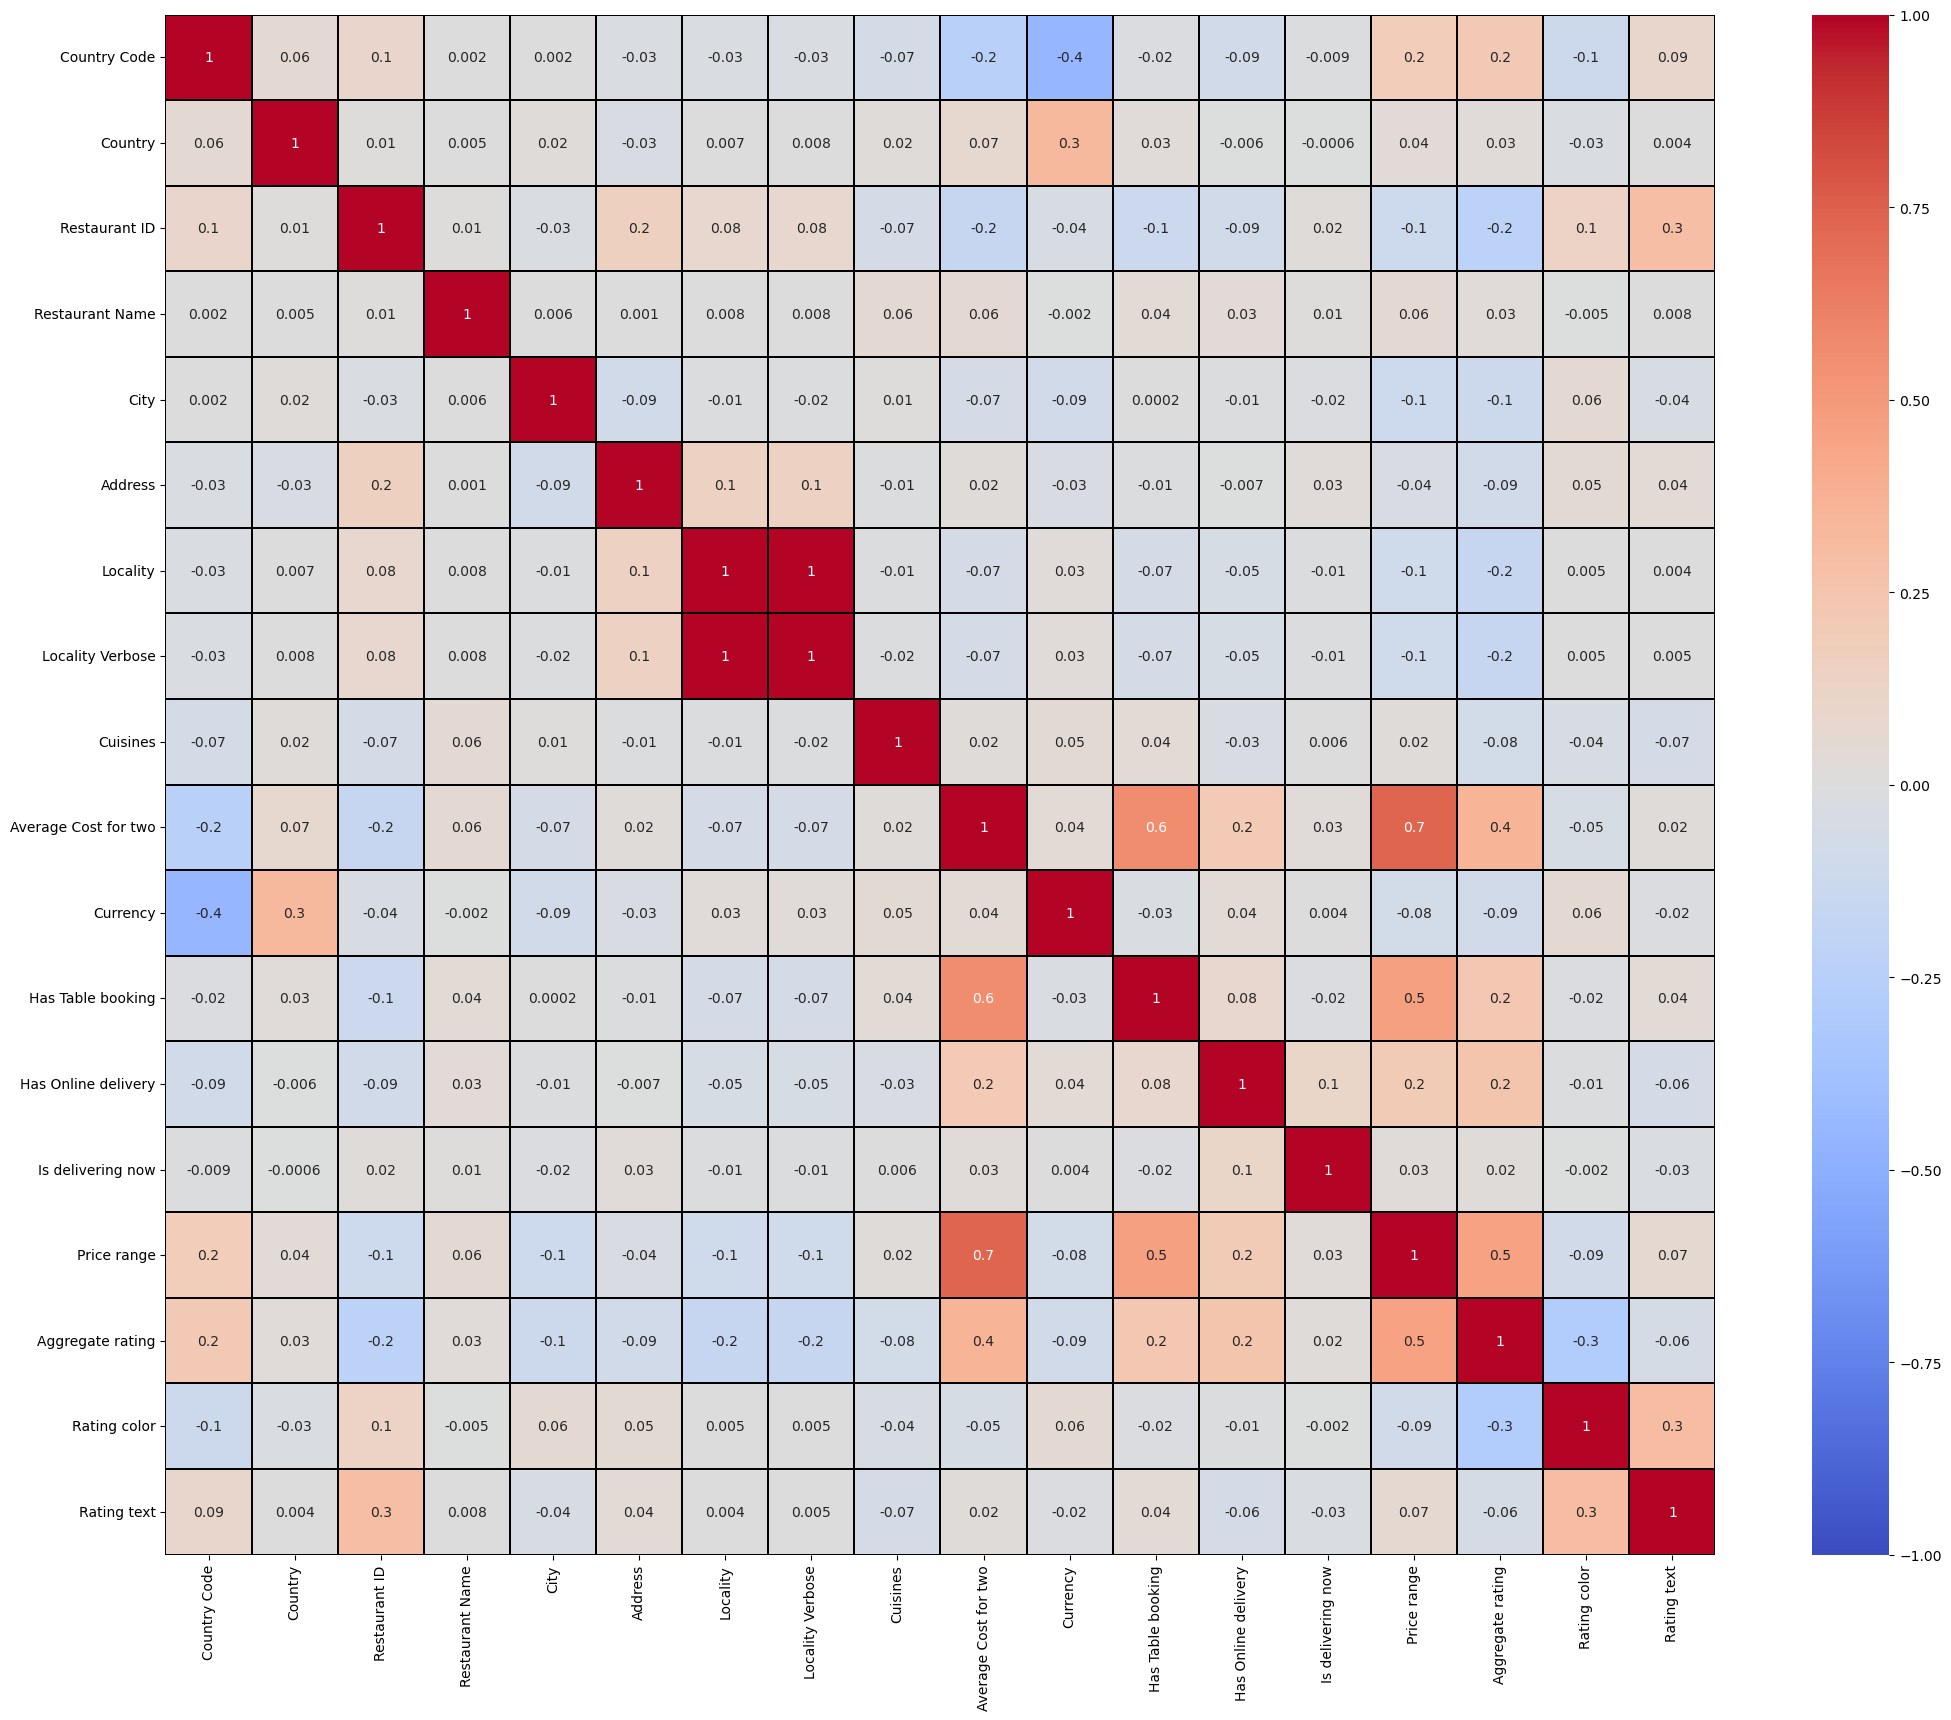

In [123]:
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

In [124]:
'''multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

Let's visualize the correlation of all the features with target to get better insight.'''

"multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.\n\nLet's visualize the correlation of all the features with target to get better insight."

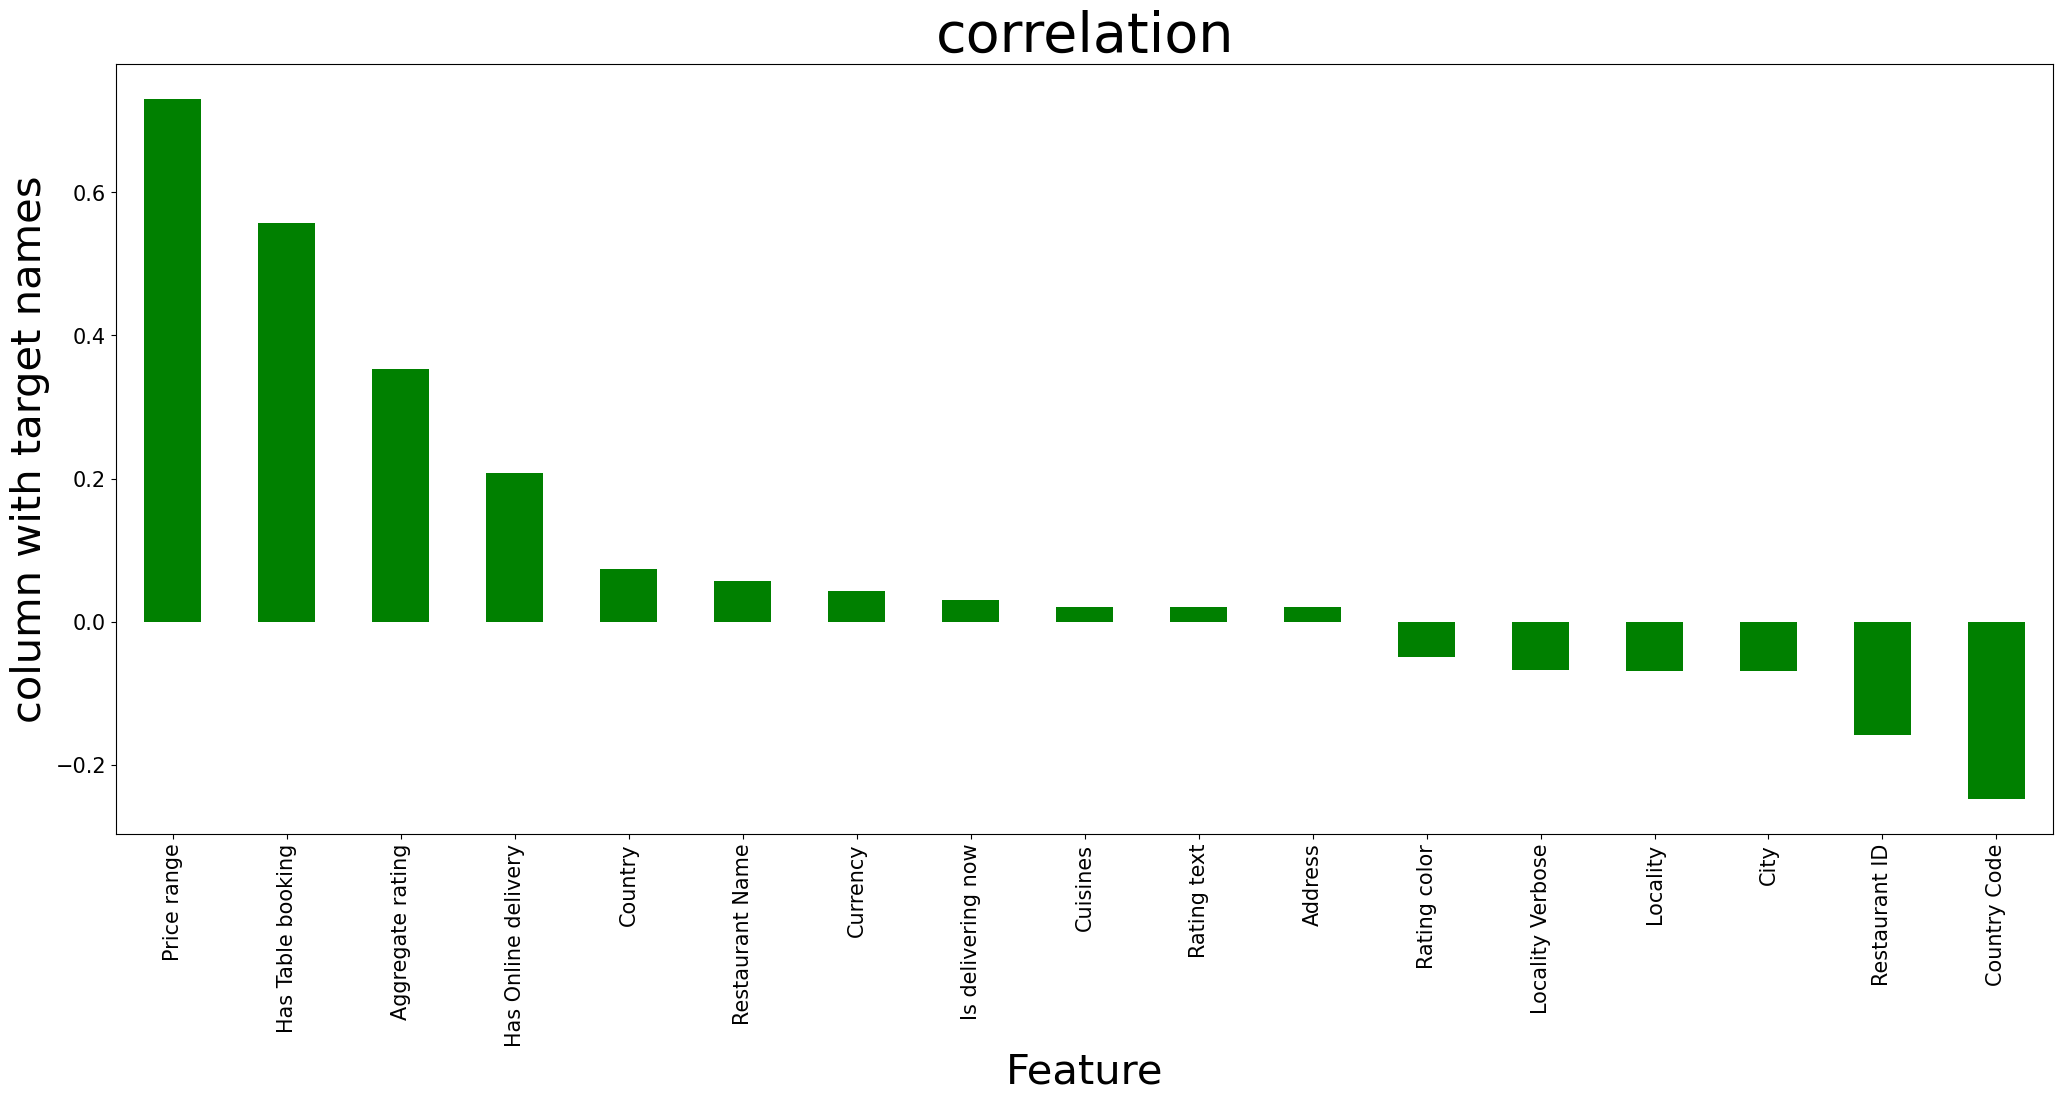

In [126]:
plt.figure(figsize=(25,10))
df_new.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

In [128]:
#Separating Features and Target:
x = df_new.drop("Average Cost for two",axis=1)
y = df_new["Average Cost for two"]

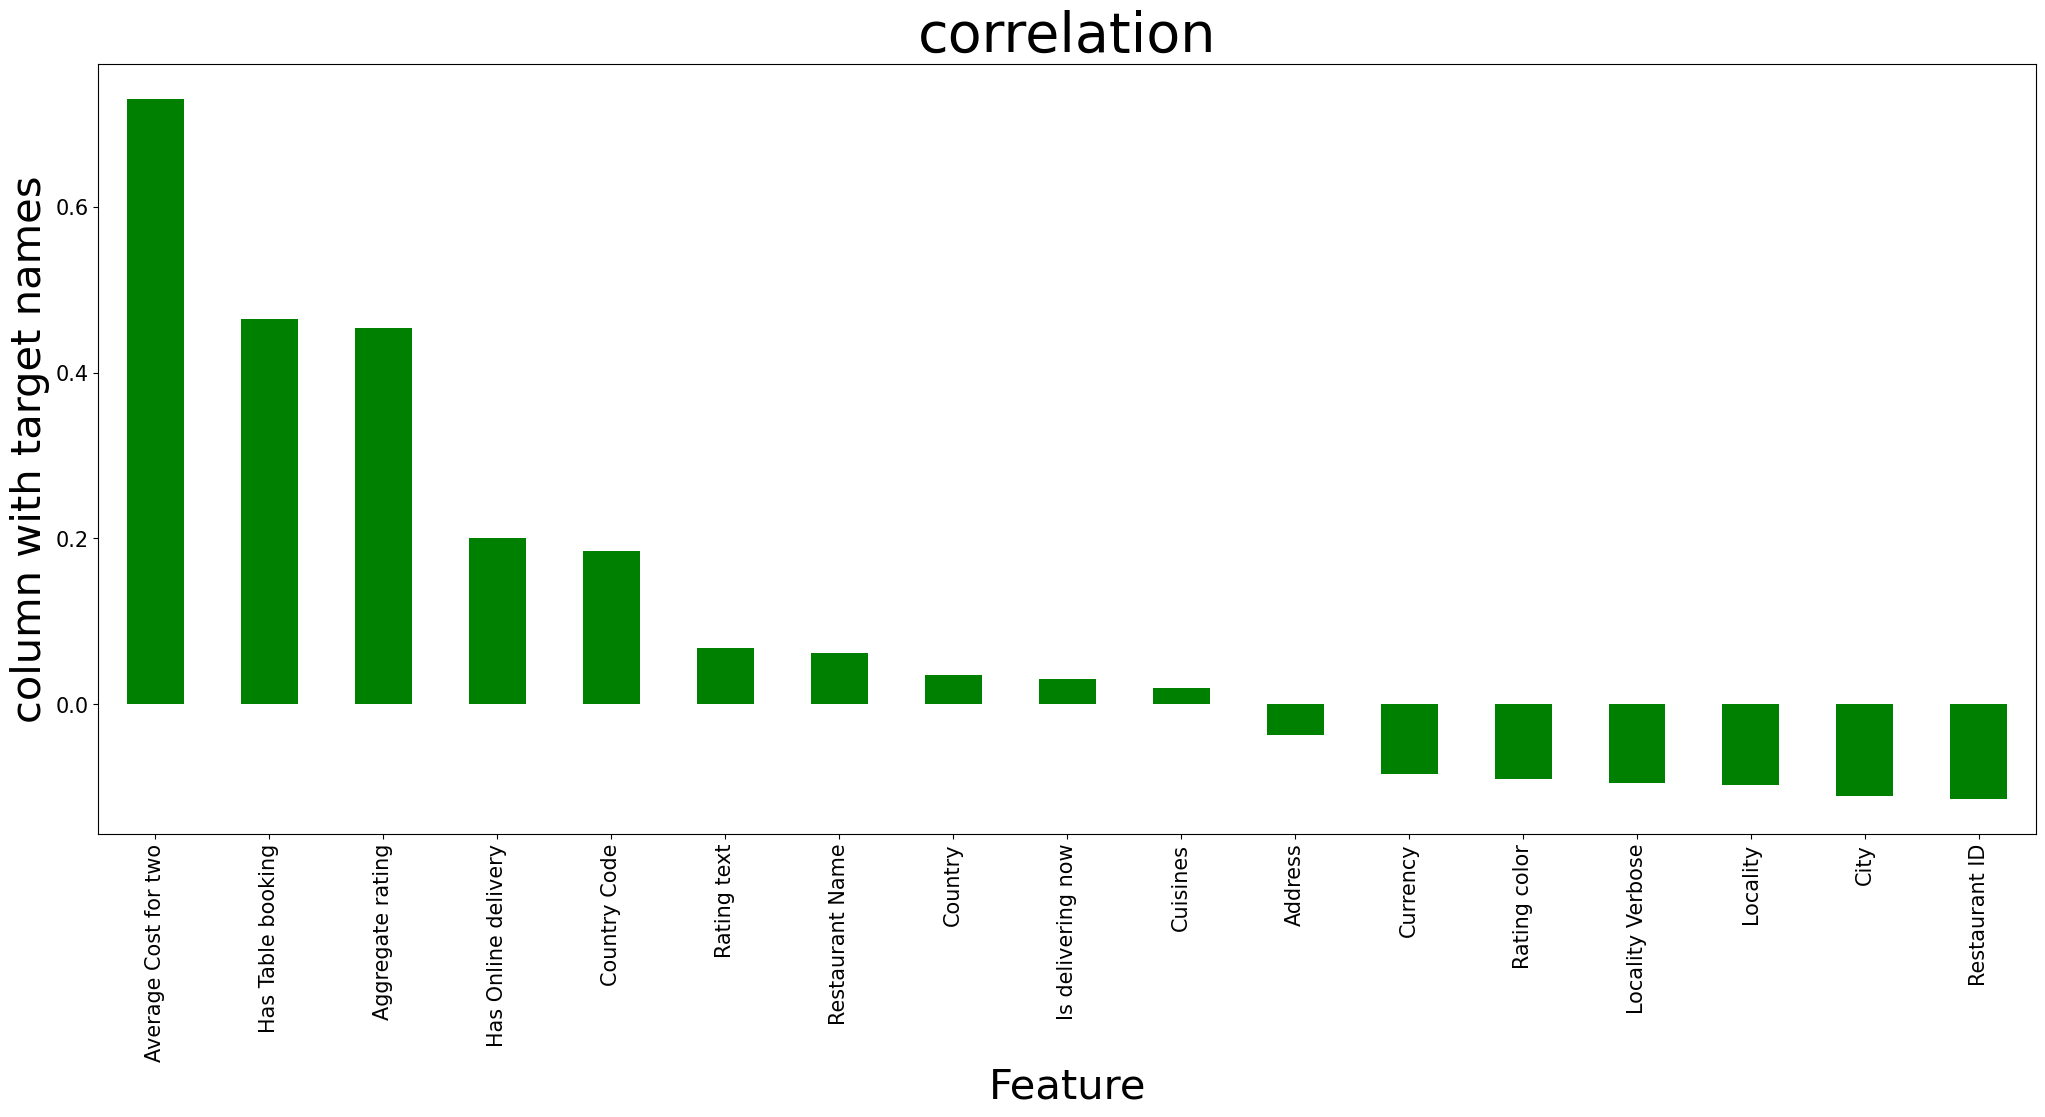

In [138]:
plt.figure(figsize=(25,10))
df_new.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

In [141]:
#Separating Features and Target:
x = df_new.drop("Price range",axis=1)
y = df_new["Price range"]

In [129]:
#Scaling the data using Standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [130]:
X.head()


,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text
0,-0.149491,-0.009105,0.211002,-0.211859,-3.587884,-0.092647,-2.005899,-1.953918,1.040530,0.067252,-0.373878,-0.611743,-0.062666,1.303731,1.153918,1.391309,0.212137
1,-0.149491,-0.009105,0.211039,0.761246,-3.587884,-0.070677,-2.005899,-1.953918,1.040530,0.067252,-0.373878,-0.611743,-0.062666,0.735253,0.571623,1.391309,0.212137
2,-0.149491,-0.009105,0.211000,1.534953,-3.587884,0.595295,-2.005899,-1.953918,0.551714,0.067252,-0.373878,-0.611743,-0.062666,0.735253,0.706871,1.391309,0.212137
3,-0.149491,-0.009105,0.211002,-0.926889,-3.587884,-1.731300,-1.493209,-1.470730,1.319853,0.067252,-0.373878,-0.611743,-0.062666,0.735253,1.317058,-1.455839,2.060960
4,-0.149491,-0.009105,0.211001,0.592485,-3.587884,-1.308283,-1.493209,-1.470730,0.710640,0.067252,-0.373878,-0.611743,-0.062666,1.303731,1.665167,-1.455839,2.060960


In [131]:
#Checking for multicolinearity issue using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.491789,Country Code
1,1.201282,Country
2,1.210703,Restaurant ID
3,1.009529,Restaurant Name
4,1.062901,City
5,1.063055,Address
6,591.907634,Locality
7,591.907984,Locality Verbose
8,1.034833,Cuisines
9,1.521665,Currency


In [132]:
#Droping high VIF columns
X = X.drop(["Locality"],axis=1)
X = X.drop(["Locality Verbose"],axis=1)

In [133]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.490038,Country Code
1,1.201170,Country
2,1.209896,Restaurant ID
3,1.009298,Restaurant Name
4,1.057139,City
5,1.043979,Address
6,1.033689,Cuisines
7,1.520103,Currency
8,1.320772,Has Table booking
9,1.125489,Has Online delivery


In [134]:
#Finding Best Random State and Accuracy:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [135]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8774254144889728  on Random_state  6


In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)


In [142]:
#Regression Algorithms:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [143]:
#i) RandomForestRegressor:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 87.74864760975845
mean_squared_error: 0.12090438244146204
mean_absolute_error: 0.25436226843386
root_mean_squared_error: 0.347713074878501

Cross validation score : 100.0

R2_Score - Cross Validation Score : -12.25135239024155


In [144]:
#ii) XGBRegressor:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 86.93950833188553
mean_squared_error: 0.12888949964193355
mean_absolute_error: 0.26249435516679714
root_mean_squared_error: 0.3590118377462414

Cross validation score : 99.99999998360198

R2_Score - Cross Validation Score : -13.060491651716447


In [145]:
#iii) GradientBoostingRegressor:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 85.80324953905703
mean_squared_error: 0.140102846810858
mean_absolute_error: 0.2848034644655017
root_mean_squared_error: 0.37430314827804745

Cross validation score : 99.99999992421722

R2_Score - Cross Validation Score : -14.196750385160186


In [146]:
#iv) DecisionTreeRegressor:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 74.63554144055887
mean_squared_error: 0.25031311649593513
mean_absolute_error: 0.3278045586112967
root_mean_squared_error: 0.5003130185153442

Cross validation score : 100.0

R2_Score - Cross Validation Score : -25.364458559441132


In [147]:
#v) Bagging Regressor:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 86.74424073170776
mean_squared_error: 0.13081652841870145
mean_absolute_error: 0.2631528425311829
root_mean_squared_error: 0.3616856762697432

Cross validation score : 100.0

R2_Score - Cross Validation Score : -13.255759268292238
